In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

from visualization import *
from load import *

In [ ]:
metrics = load_metrics('../results/metrics.csv')
metrics = preprocessing_metrics(metrics)

metrics.head()

In [2]:
system = pd.read_csv('../results/systemdefault.csv')
system = system.drop(columns=['splitter'])
system = system.rename(columns={'diskWriteTime': 'DiskWriteTime'})
system.head()

,MemTotal,MemFree,MemAvailable,CpuUsage,DiskReads,DiskReadTime,DiskWrites,DiskWriteTime,NetIn,NetOut,node,algorithm,dataset,family,platformId,runId
0,131811648,120983064,128889932,9.254202,0,0,0,0,0,0,0,Linear,drivface,regression,0,4
1,131811648,120982924,128889800,0.000000,0,0,0,0,185,832,0,Linear,drivface,regression,0,4
2,131811648,120983016,128889896,0.031104,0,0,0,0,93,282,0,Linear,drivface,regression,0,4
3,131811648,119985236,127893008,37.167594,0,0,0,0,17381,14354,0,Linear,drivface,regression,0,4
4,131811648,118185952,126094036,60.954447,0,0,0,0,18665,12292,0,Linear,drivface,regression,0,4


In [34]:
applicative = pd.read_csv('../results/applicative.csv')
applicative_new = pd.read_csv('../results/applicative-new.csv')

In [35]:
translate = {
    'BisectingKMeans': 'BKM',
    'KMeans': 'KM',
    'Tree': 'DT',
    'Logistic': 'BLR',
    'Linear': 'LR',
    'GBT': 'GBT',
    'RFR': 'RFR',
    'GMM': 'GMM',
    'MLP': 'MLP'
}

#metrics['algorithm'] = metrics['algorithm'].apply(lambda algo: translate[algo])
#system['algorithm'] = system['algorithm'].apply(lambda algo: translate[algo])
applicative['algorithm'] = applicative['algorithm'].apply(lambda algo: translate[algo])
applicative_new['algorithm'] = applicative_new['algorithm'].apply(lambda algo: translate[algo])

In [36]:
translate = {
    'drivface': 'DDF',
    'drift': 'DGS',
    'geomagnetic': 'DSS',
    'drugs': 'DDR',
    'higgs': 'DHG'
}

#metrics['dataset'] = metrics['dataset'].apply(lambda data: translate[data])
#system['dataset'] = system['dataset'].apply(lambda data: translate[data])
applicative['dataset'] = applicative['dataset'].apply(lambda data: translate[data])
applicative_new['dataset'] = applicative_new['dataset'].apply(lambda algo: translate[algo])

In [5]:
ids = metrics.columns[metrics.columns.str.contains('Id')]

In [6]:
spark = [
    'duration', 'schedulerDelay', 'gettingResultTime', 'executorRunTime',
    'executorCpuTime', 'executorDeserializeTime',
    'executorDeserializeCpuTime', 'resultSerializationTime', 'jvmGCTime',
    'resultSize', 'numUpdatedBlockStatuses', 'diskBytesSpilled',
    'memoryBytesSpilled', 'peakExecutionMemory', 'recordsRead', 'bytesRead',
    'recordsWritten', 'bytesWritten', 'shuffleFetchWaitTime',
    'shuffleTotalBytesRead', 'shuffleTotalBlocksFetched',
    'shuffleLocalBlocksFetched', 'shuffleRemoteBlocksFetched',
    'shuffleWriteTime', 'shuffleBytesWritten', 'shuffleRecordsWritten'
]

# All

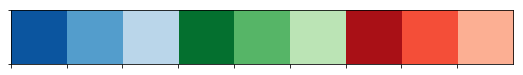

In [5]:
plt.rcParams.update({'font.size': 15})

customcmap = [
    (0.044059976931949255, 0.3338869665513264, 0.6244521337946944),
    (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
    (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
    
    (0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
    (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
    (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
    
    (0.6663437139561708, 0.06339100346020761, 0.08641291810841982),
    (0.9570011534025374, 0.3087120338331411, 0.22191464821222606),
    (0.9882352941176471, 0.6866743560169165, 0.5778854286812765)
]

sns.palplot(customcmap)

hue_order = ['KM', 'BKM', 'GMM', 'DT', 'MLP', 'BLR', 'LR', 'RFR', 'GBT']
order = ['DDF', 'DGS', 'DSS', 'DDR', 'DHG']

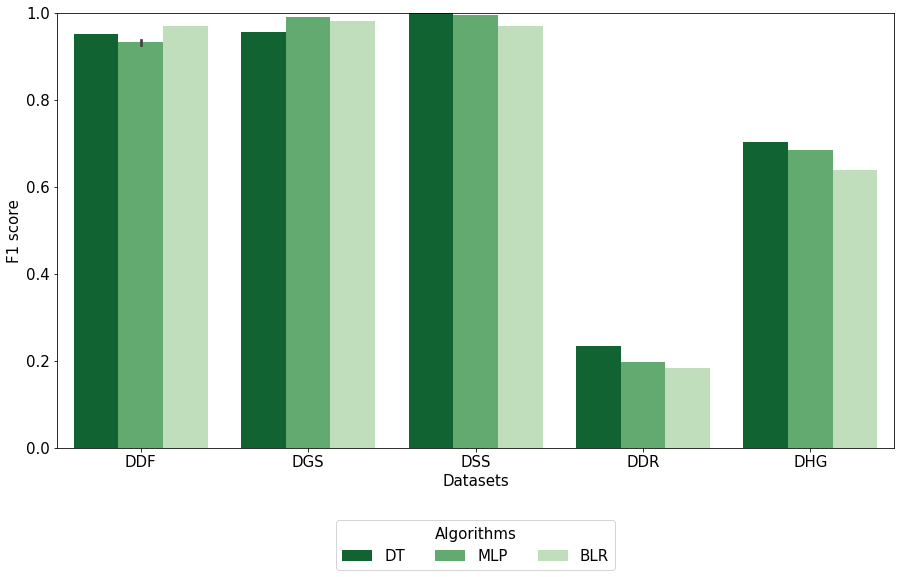

In [407]:
data = metrics
data = data.groupby(['dataset', 'algorithm', 'runId']).agg({'r2': 'first', 'f1': 'first', 'silhouette': 'first', 'family': 'first'}).reset_index()
data = data[data['family'] == 'classification']

data['Datasets'] = data['dataset']

data = data.rename(columns={'f1': 'F1 score'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='F1 score', hue='algorithm', data=data, hue_order=hue_order[3:6], order=order, palette=customcmap[3:6])
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.ylim((0, 1))

plt.savefig('stat1-f1-score.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

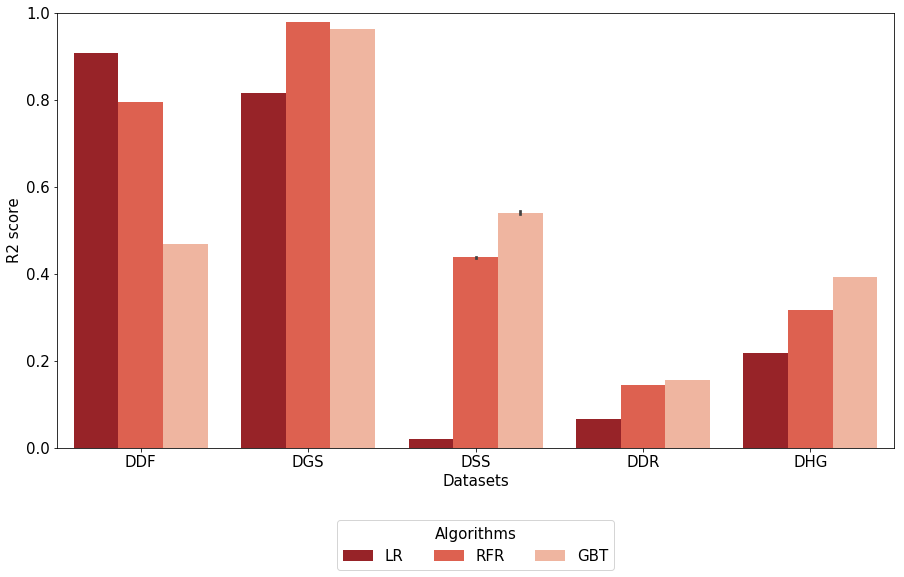

In [408]:
data = metrics
data = data.groupby(['dataset', 'algorithm', 'runId']).agg({'r2': 'first', 'f1': 'first', 'silhouette': 'first', 'family': 'first'}).reset_index()
data = data[data['family'] == 'regression']

data['Datasets'] = data['dataset']

data = data.rename(columns={'r2': 'R2 score'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='R2 score', hue='algorithm', data=data, hue_order=hue_order[6:10], order=order, palette=customcmap[6:10])
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.ylim((0, 1))

plt.savefig('stat1-r2-score.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

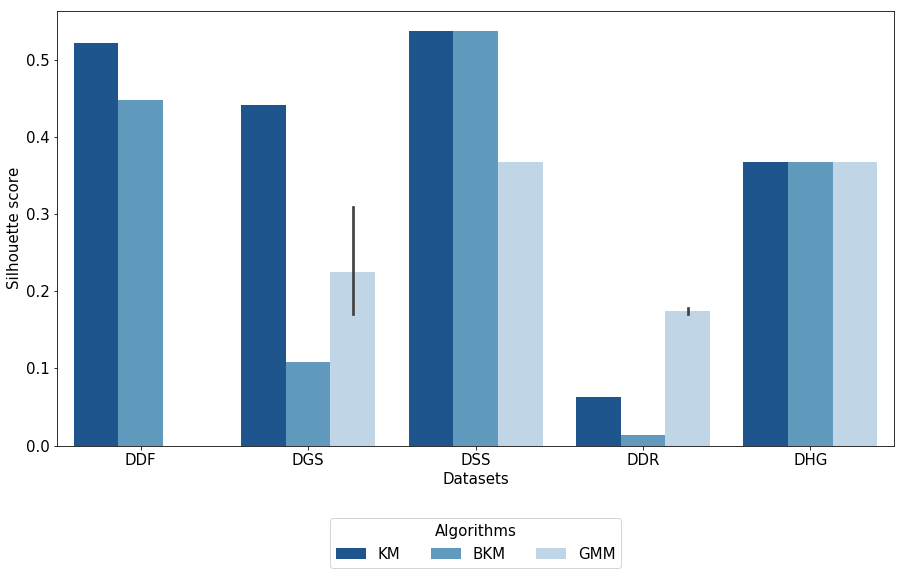

In [410]:
data = metrics
data = data.groupby(['dataset', 'algorithm', 'runId']).agg({'r2': 'first', 'f1': 'first', 'silhouette': 'first', 'family': 'first'}).reset_index()
data = data[data['family'] == 'clustering']

data['Datasets'] = data['dataset']

data = data.rename(columns={'silhouette': 'Silhouette score'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Silhouette score', hue='algorithm', data=data, hue_order=hue_order[0:3], order=order, palette=customcmap[0:3])
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')

plt.savefig('stat1-silhouette-score.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


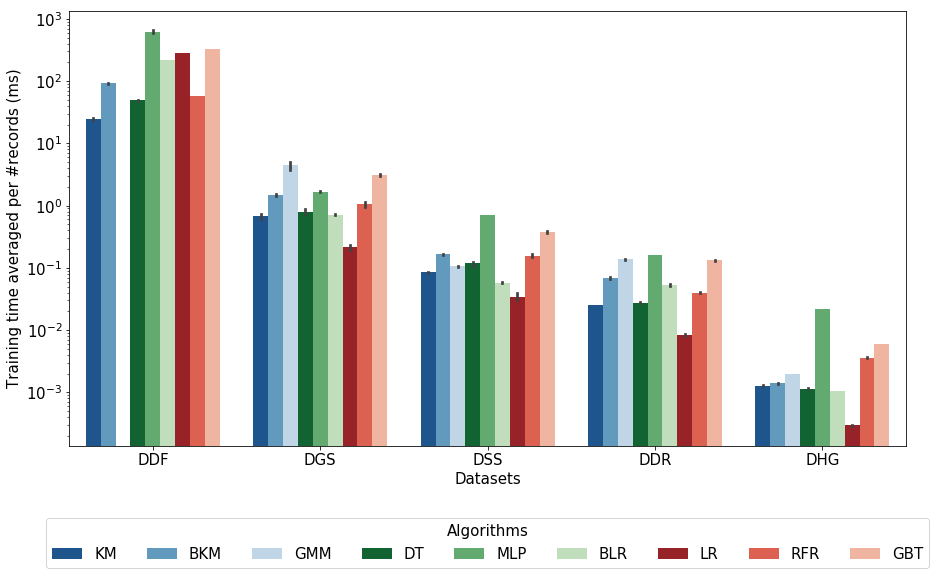

In [8]:
data = metrics
data = data[(data['phase'] == 'fit')]
data = data.groupby(['dataset', 'algorithm', 'runId']).agg({'fitTime': 'first', 'trainCount': 'first'}).reset_index()

data['time'] = data['fitTime'] / data['trainCount']
data['Datasets'] = data['dataset']

data = data.rename(columns={'time': 'Training time averaged per #records (ms)'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Training time averaged per #records (ms)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-training-time-per-record.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [29]:
default = applicative[applicative['platformId'] == 0].copy()
bis = default.copy()
default['platformId'] = default['platformId'] + 3
bis['platformId'] = bis['platformId'] + 2

In [39]:
data = pd.concat([applicative_new, bis, default])
app = data

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [33]:
pd.read_csv('../results/configuration-new.csv').drop_duplicates()

,platformId,spark.reducer.maxSizeInFlight,spark.shuffle.file.buffer,spark.io.compression.codec,spark.shuffle.compress,spark.executor.cores,spark.serializer,spark.master,spark.dynamicAllocation.enabled,spark.shuffle.spill.compress,spark.locality.wait,spark.rdd.compress,spark.driver.memory,spark.shuffle.io.preferDirectBufs,spark.driver.cores,spark.storage.memoryFraction,spark.executor.memory
0,1,48m,32k,snappy,True,4,org.apache.spark.serializer.JavaSerializer,spark://master:7077,False,True,10ms,False,5g,True,2,0.6,5g
5,0,48m,32k,snappy,True,4,org.apache.spark.serializer.JavaSerializer,spark://master:7077,False,True,1ms,False,5g,True,2,0.6,5g


DDF


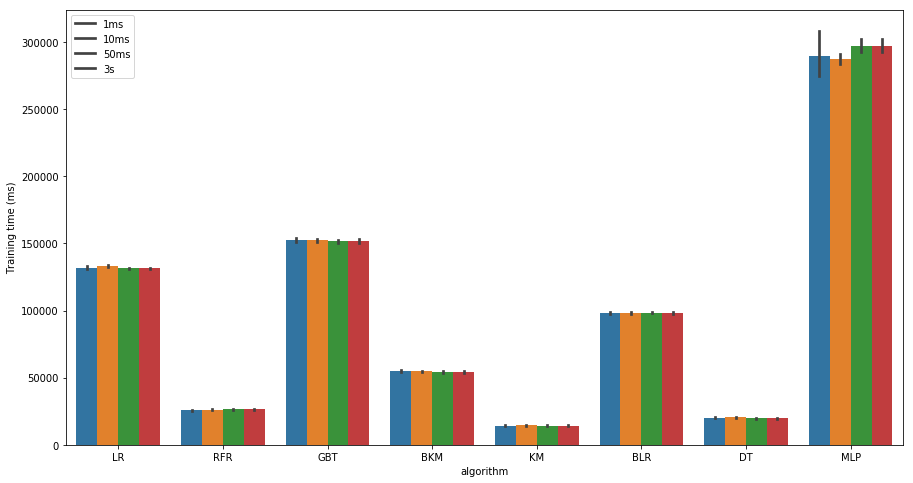

DGS


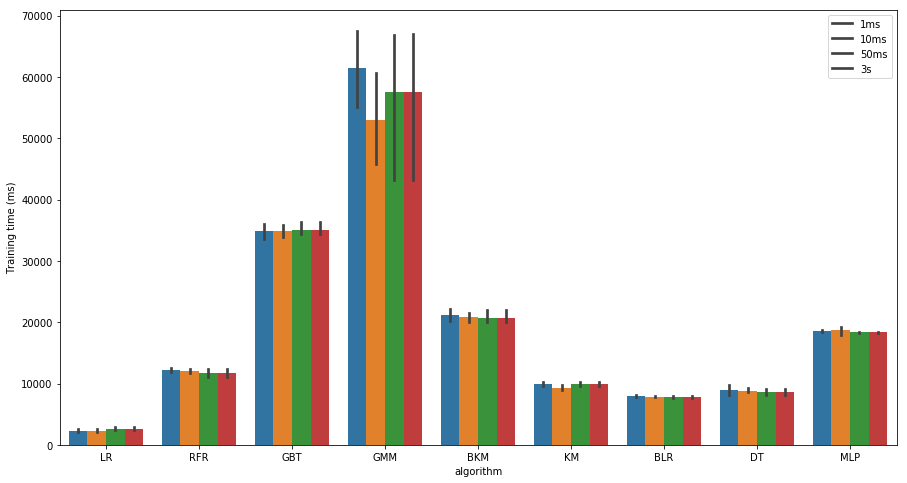

DSS


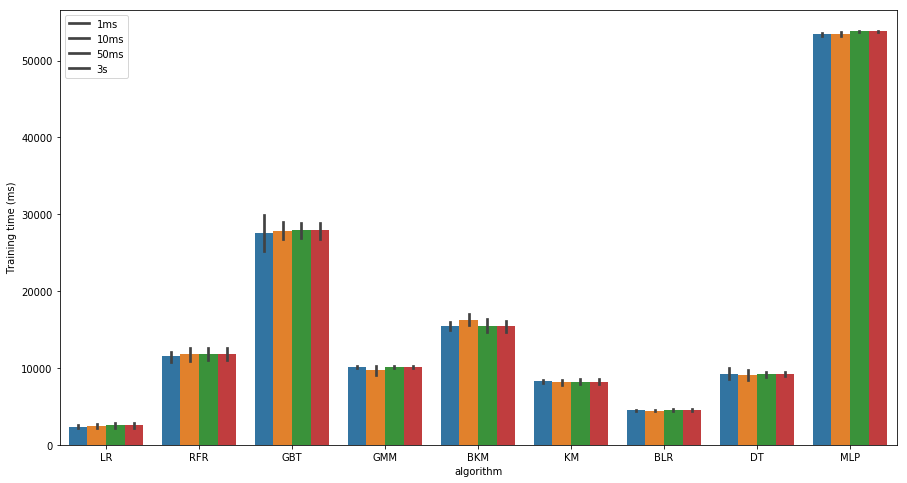

DHG


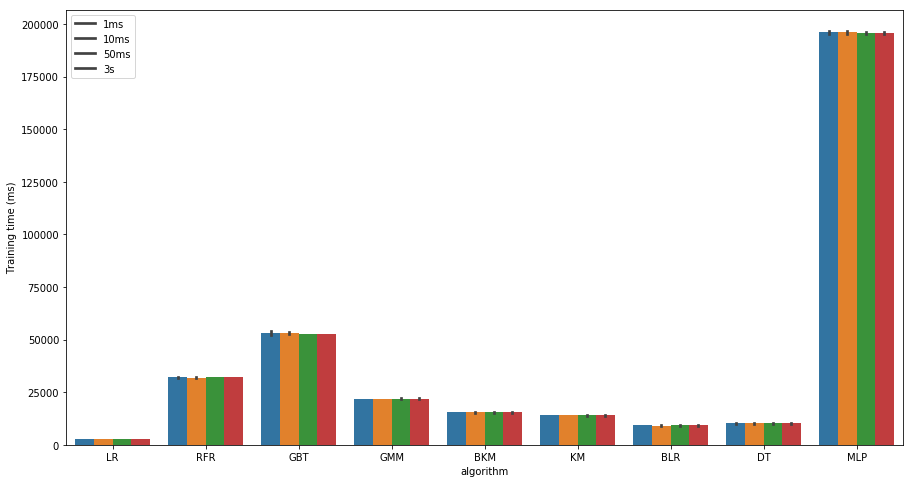

DDR


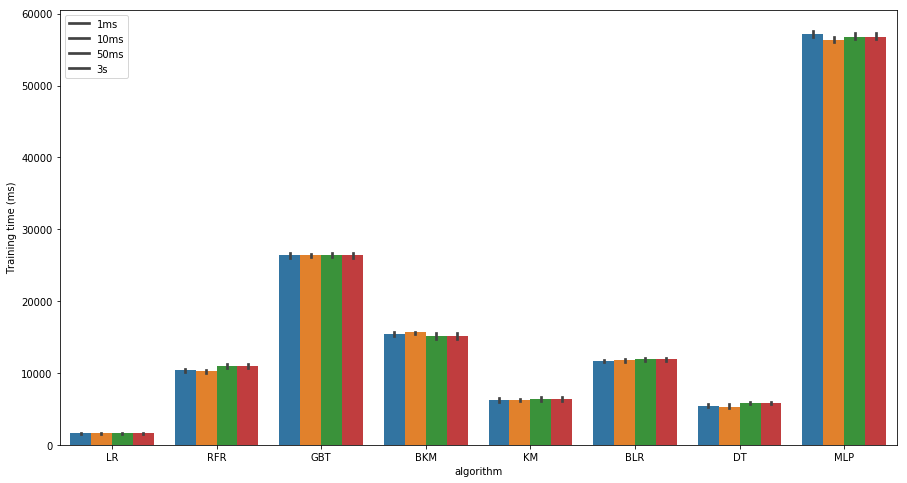

In [43]:
for dt in app['dataset'].drop_duplicates():
    print(dt)
    data = app
    data = data[data['dataset'] == dt].copy()

    data = data.rename(columns={'fitTime': 'Training time (ms)'})

    plt.figure(figsize=(15, 8))
    sns.barplot(x='algorithm', y='Training time (ms)', hue='platformId', data=data)

    plt.gca().legend(['1ms', '10ms', '50ms', '3s'])
    plt.show()
#lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')


#plt.savefig('stat1-training-time.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [25]:
configuration[configuration['platformId'] == 11].drop_duplicates()

,platformId,spark.shuffle.compress,spark.master,spark.io.compression.codec,spark.shuffle.file.buffer,spark.storage.memoryFraction,spark.shuffle.io.preferDirectBufs,spark.rdd.compress,spark.dynamicAllocation.enabled,spark.executor.memory,spark.driver.cores,spark.executor.cores,spark.driver.memory,spark.reducer.maxSizeInFlight,spark.serializer,spark.shuffle.spill.compress,spark.executor.instances
85,11,True,spark://master:7077,snappy,32k,0.6,True,False,False,5g,2,4,5g,48m,org.apache.spark.serializer.KryoSerializer,True,NaN


DDF


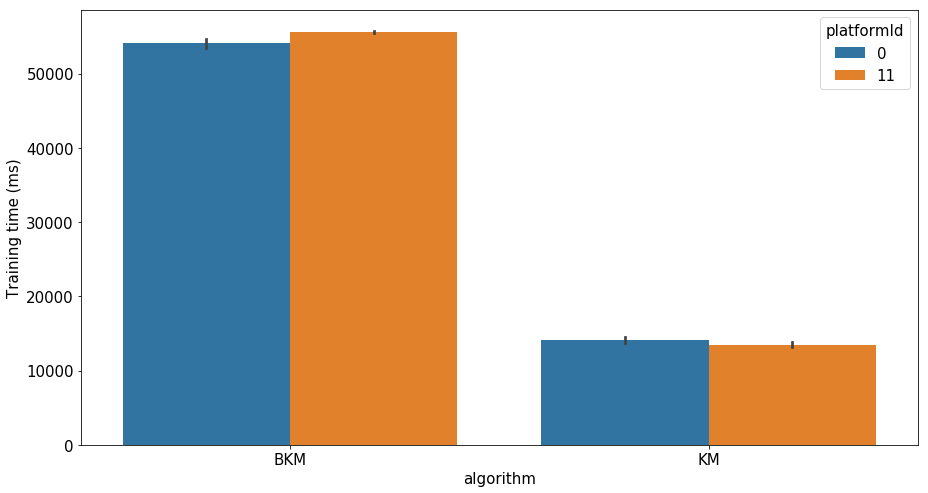

DGS


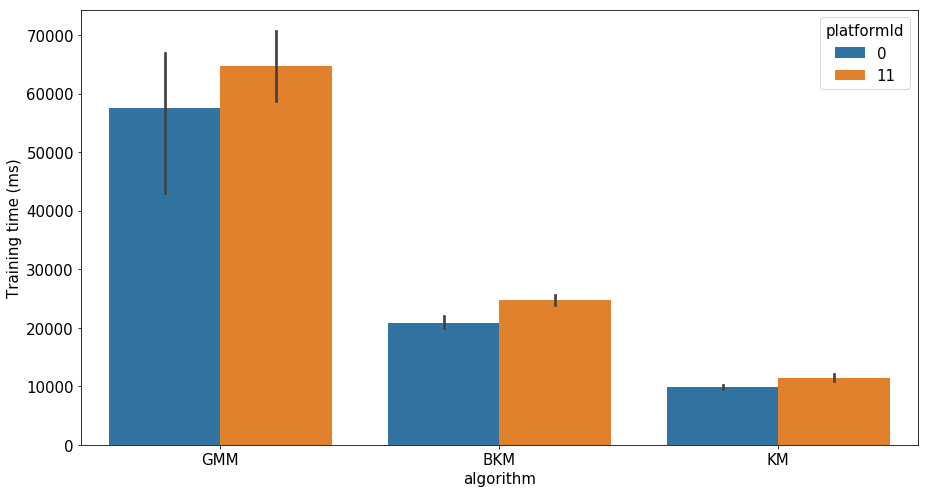

DSS


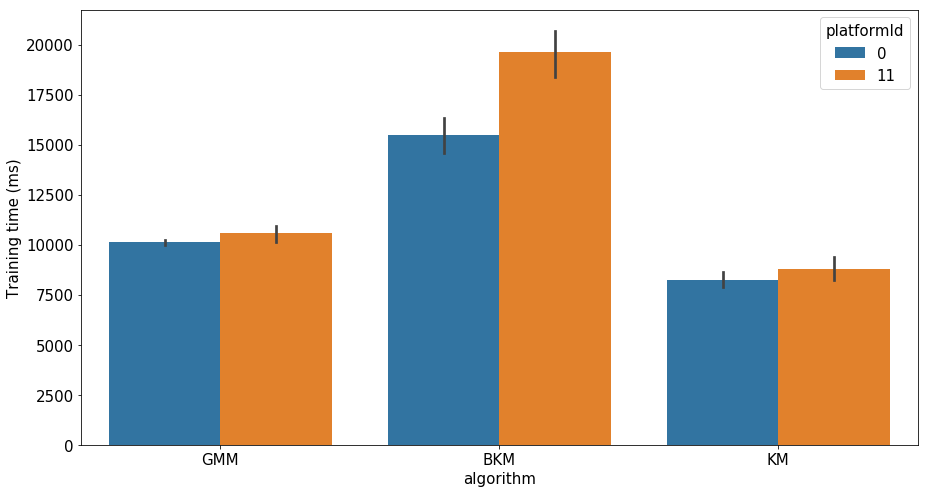

DHG


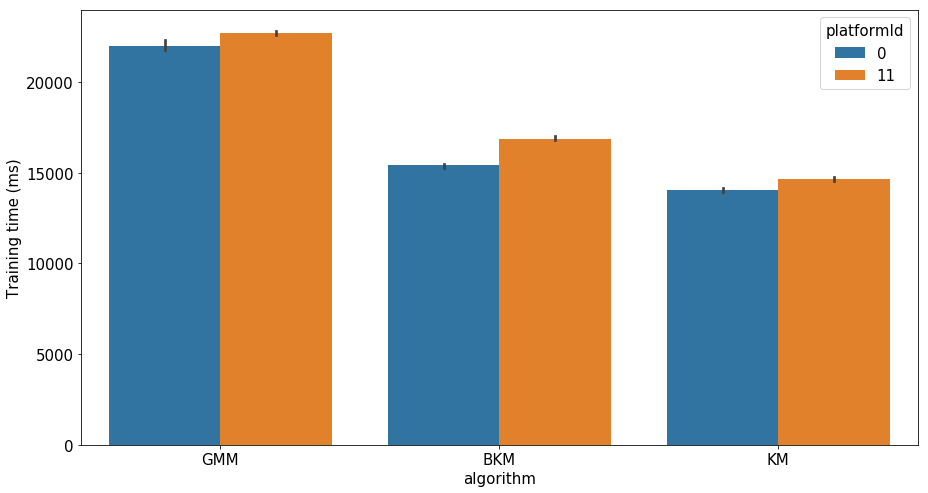

DDR


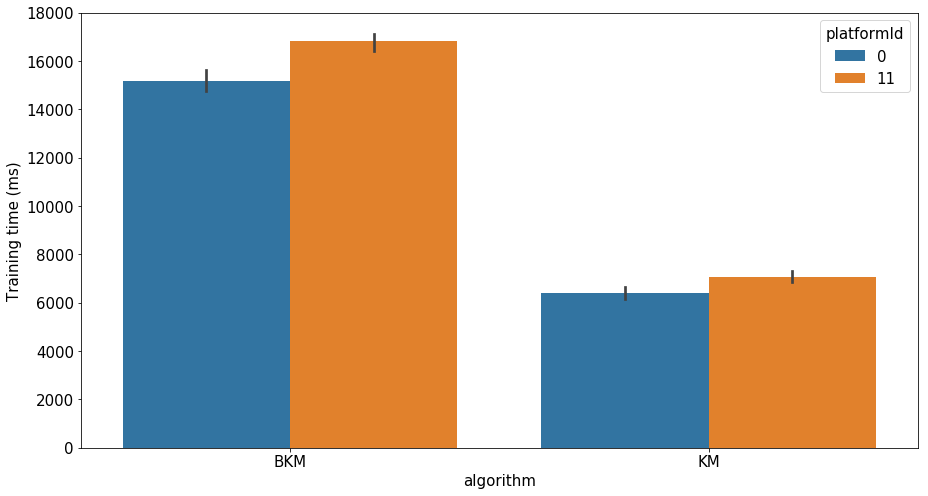

In [38]:
for dt in applicative['dataset'].drop_duplicates():
    print(dt)
    data = applicative
    data = data[((data['platformId'] == 11) | (data['platformId'] == 0)) & (data['dataset'] == dt) & ((data['algorithm'] == 'KM') | (data['algorithm'] == 'BKM') | (data['algorithm'] == 'GMM'))].copy()

    data = data.rename(columns={'fitTime': 'Training time (ms)'})

    plt.figure(figsize=(15, 8))
    sns.barplot(x='algorithm', y='Training time (ms)', hue='platformId', data=data)
    plt.show()
#lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')


#plt.savefig('stat1-training-time.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

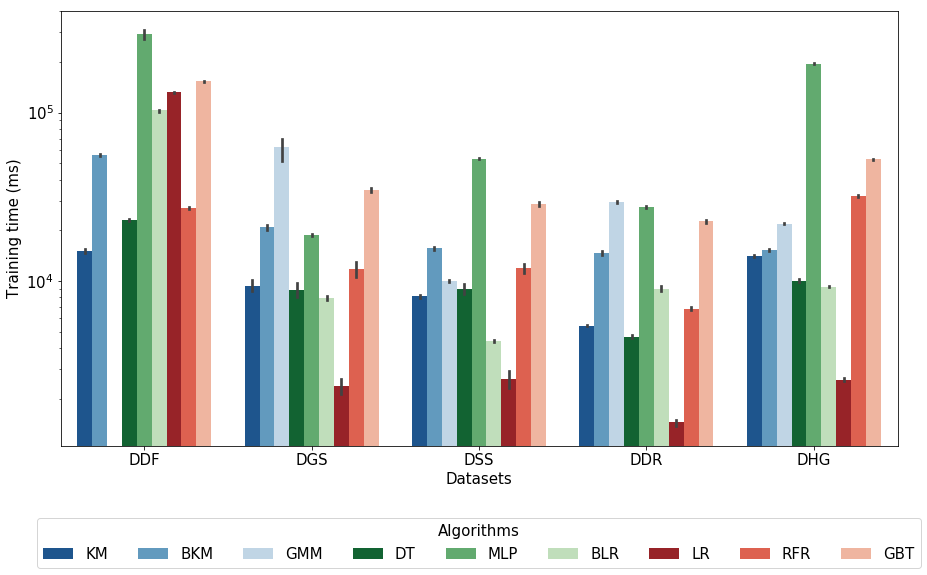

In [27]:
data = metrics
data = data[(data['phase'] == 'fit')]
data = data.groupby(['dataset', 'algorithm', 'runId']).agg({'fitTime': 'first', 'trainCount': 'first'}).reset_index()

data['Datasets'] = data['dataset']

data = data.rename(columns={'fitTime': 'Training time (ms)'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Training time (ms)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-training-time.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

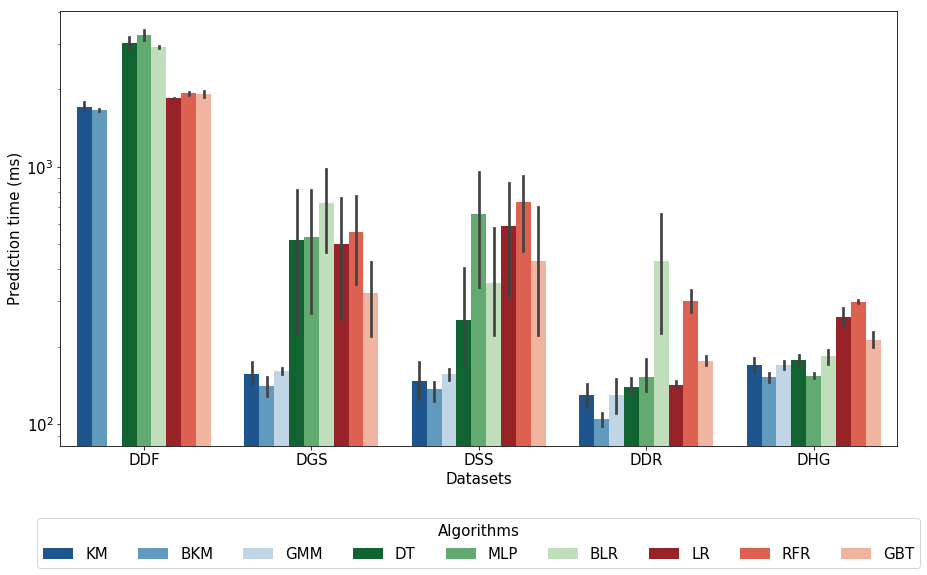

In [28]:
data = metrics
data = data[(data['phase'] == 'transform')]
data = data.groupby(['dataset', 'algorithm', 'runId']).agg({'transformTime': 'first'}).reset_index()

data['Datasets'] = data['dataset']

data = data.rename(columns={'transformTime': 'Prediction time (ms)'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Prediction time (ms)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-prediction-time.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

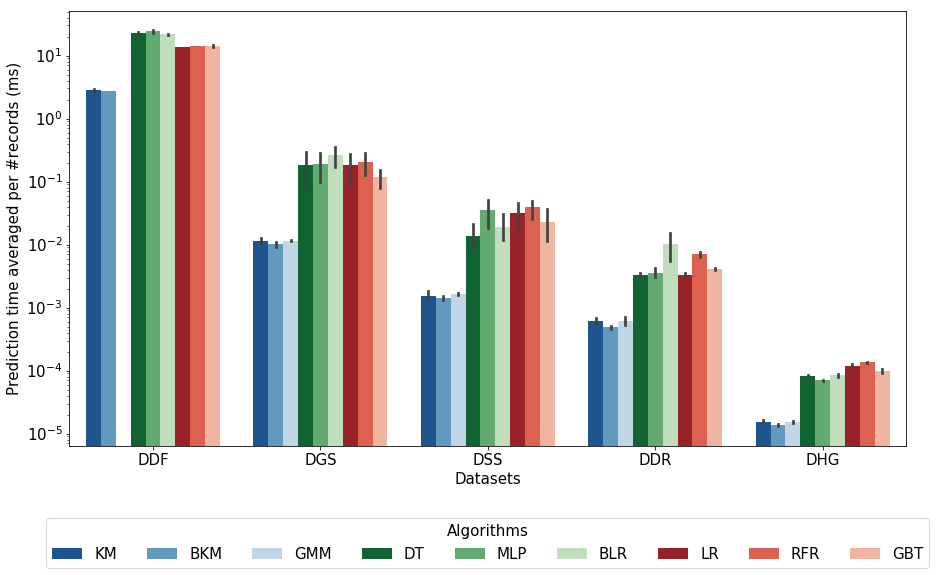

In [9]:
data = metrics
data = data[(data['phase'] == 'transform')]
data = data.groupby(['dataset', 'algorithm', 'runId']).agg({'transformTime': 'first', 'testCount': 'first'}).reset_index()

data['time'] = data['transformTime'] / data['testCount']
data['Datasets'] = data['dataset']

data = data.rename(columns={'time': 'Prediction time averaged per #records (ms)'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Prediction time averaged per #records (ms)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-prediction-time-per-record.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

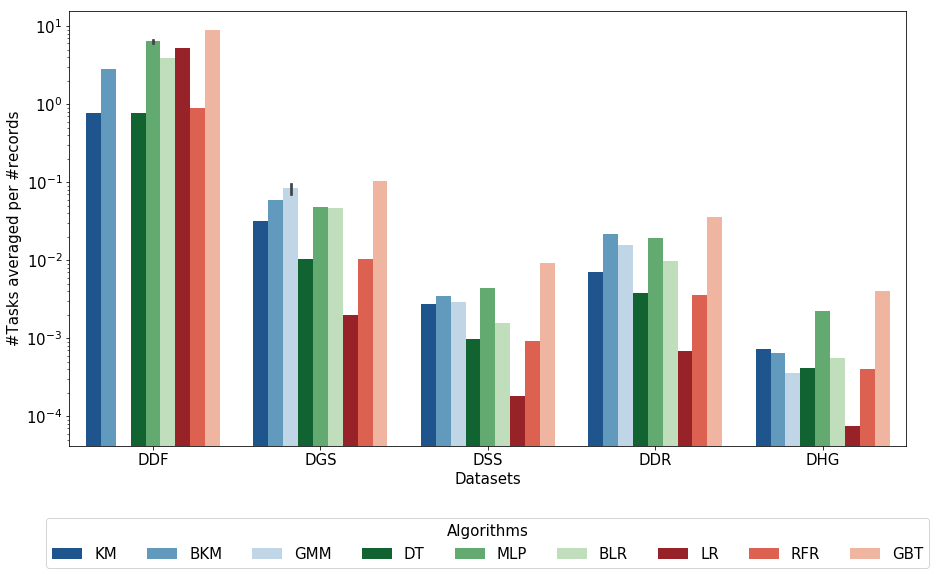

In [10]:
data = metrics
data = data[(data['phase'] == 'fit')]
#data = data.groupby(['dataset', 'algorithm', 'runId']).agg({'taskId': 'nunique'}).reset_index()
data = data.groupby(['dataset', 'algorithm', 'runId']).apply(lambda df: pd.Series({
    'taskIdWithout': (df['shuffleFetchWaitTime'] == 0).sum(),
    'taskIdWith':    (df['shuffleFetchWaitTime'] != 0).sum(),
    'taskId': df['taskId'].nunique(),
    'trainCount': df['trainCount'].iloc[0]
})).reset_index()

data['Datasets'] = data['dataset']

data['taskIdPerRecord'] = data['taskId'] / data['trainCount']
data = data.rename(columns={'taskIdPerRecord': '#Tasks averaged per #records'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='#Tasks averaged per #records', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-training-nb-tasks-per-record.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

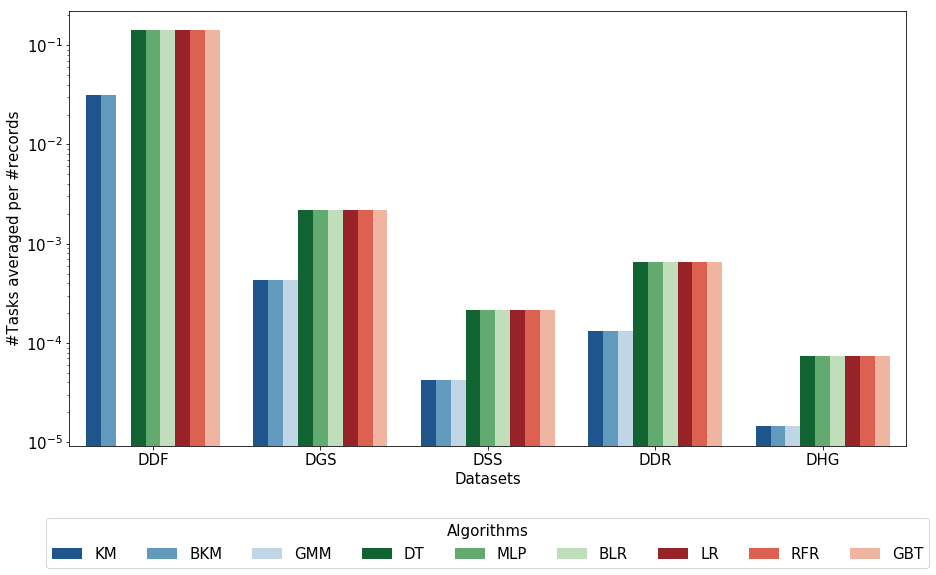

In [11]:
data = metrics
data = data[(data['phase'] == 'transform')]
#data = data.groupby(['dataset', 'algorithm', 'runId']).agg({'taskId': 'nunique'}).reset_index()
data = data.groupby(['dataset', 'algorithm', 'runId']).apply(lambda df: pd.Series({
    'taskIdWithout': (df['shuffleFetchWaitTime'] == 0).sum(),
    'taskIdWith':    (df['shuffleFetchWaitTime'] != 0).sum(),
    'taskId': df['taskId'].nunique(),
    'testCount': df['testCount'].iloc[0]
})).reset_index()

data['Datasets'] = data['dataset']

data['taskIdPerRecord'] = data['taskId'] / data['testCount']
data = data.rename(columns={'taskIdPerRecord': '#Tasks averaged per #records'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='#Tasks averaged per #records', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-prediction-nb-tasks-per-record.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

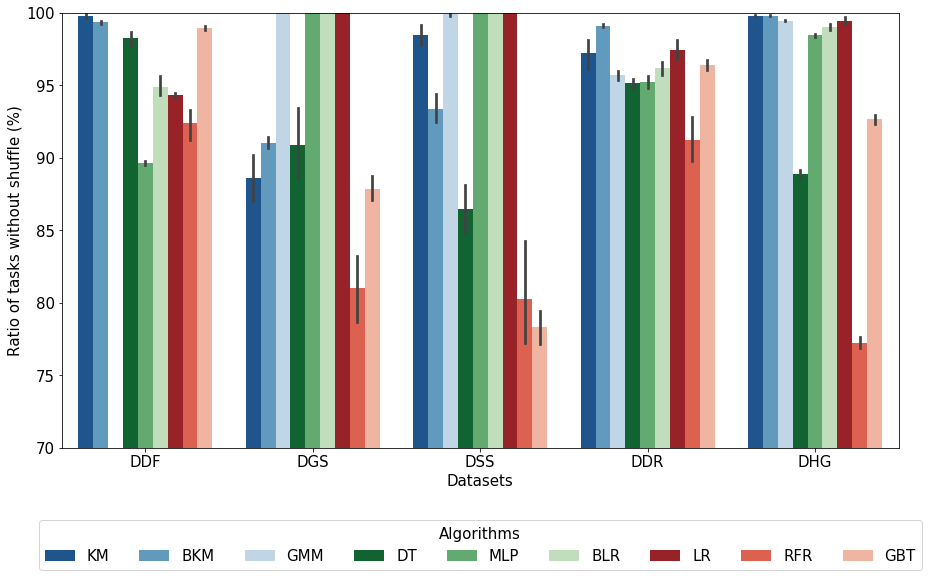

In [12]:
data = metrics
data = data[(data['phase'] == 'fit')]

data = data.groupby(['dataset', 'algorithm', 'runId']).apply(lambda df: pd.Series({
    'Ratio of tasks without shuffle (%)': 100*(df['shuffleFetchWaitTime'] == 0).sum() / len(df['shuffleFetchWaitTime'])
})).reset_index()

data['Datasets'] = data['dataset']

plt.figure(figsize=(15, 8))
plot = sns.barplot(x='Datasets', y='Ratio of tasks without shuffle (%)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.ylim((70, 100))

plt.savefig('stat1-training-ratio-tasks-without-shuffle.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

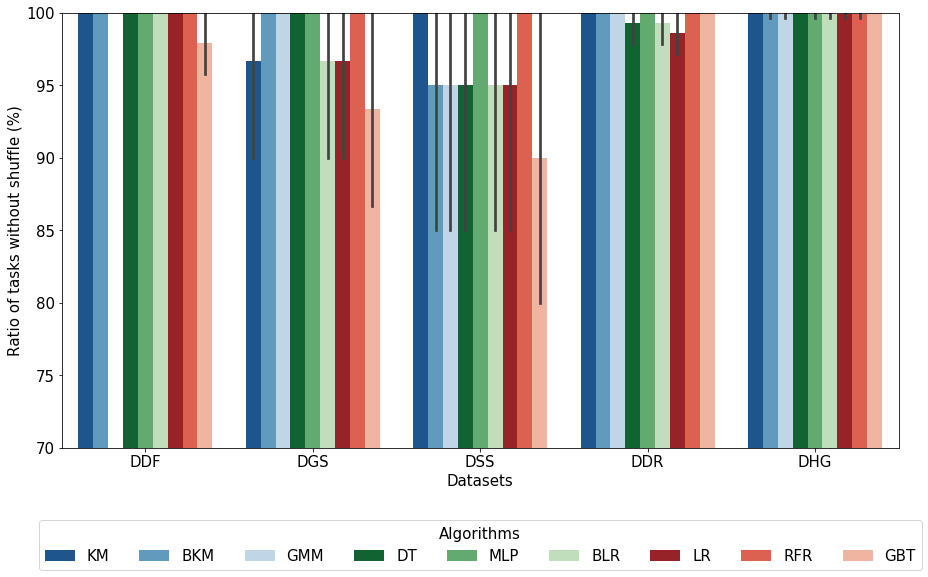

In [13]:
data = metrics
data = data[(data['phase'] == 'transform')]

data = data.groupby(['dataset', 'algorithm', 'runId']).apply(lambda df: pd.Series({
    'Ratio of tasks without shuffle (%)': 100*(df['shuffleFetchWaitTime'] == 0).sum() / len(df['shuffleFetchWaitTime'])
})).reset_index()

data['Datasets'] = data['dataset']

plt.figure(figsize=(15, 8))
plot = sns.barplot(x='Datasets', y='Ratio of tasks without shuffle (%)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.ylim((70, 100))

plt.savefig('stat1-prediction-ratio-tasks-without-shuffle.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

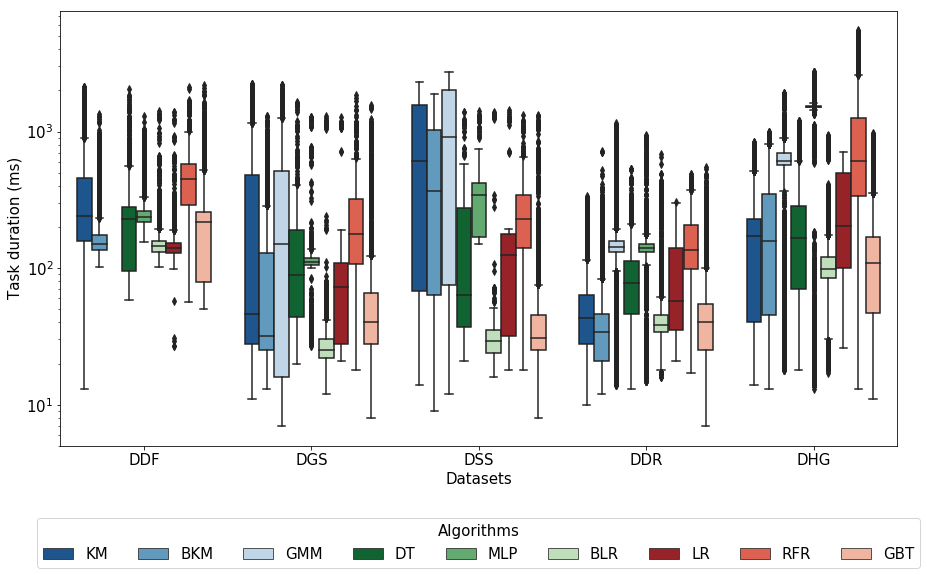

In [247]:
data = metrics
data = data[(data['phase'] == 'fit')].copy()
#data = data[data['shuffleFetchWaitTime'] == 0]

data['Datasets'] = data['dataset']

data = data.rename(columns={'duration': 'Task duration (ms)'})

plt.figure(figsize=(15, 8))
sns.boxplot(x='Datasets', y='Task duration (ms)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')
#plt.ylim((0, 1500))


#plt.savefig('stat1-training-nb-tasks.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

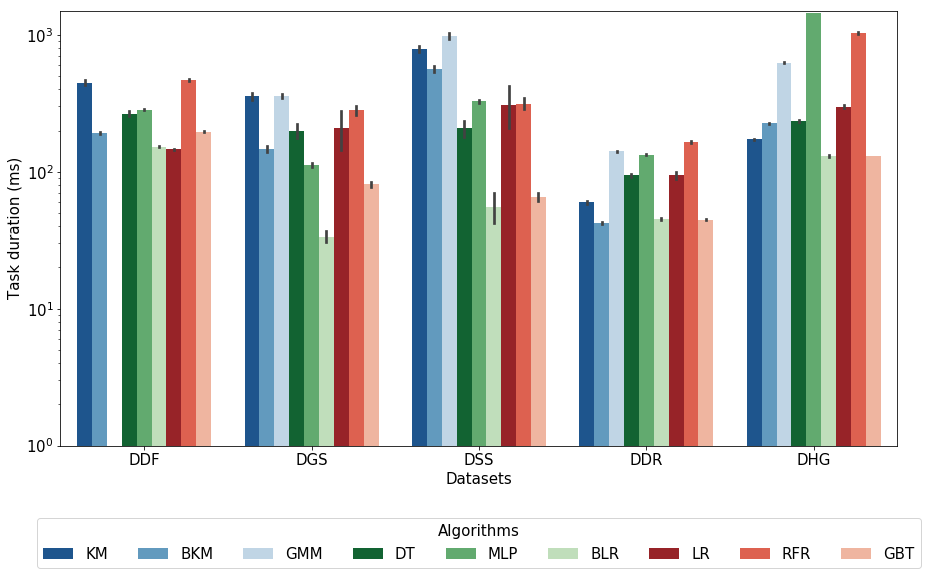

In [14]:
data = metrics
data = data[(data['phase'] == 'fit')].copy()
#data = data[data['shuffleFetchWaitTime'] == 0]

data['Datasets'] = data['dataset']

data = data.rename(columns={'duration': 'Task duration (ms)'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Task duration (ms)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')
plt.ylim((1, 1500))

plt.savefig('stat1-training-task-duration.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

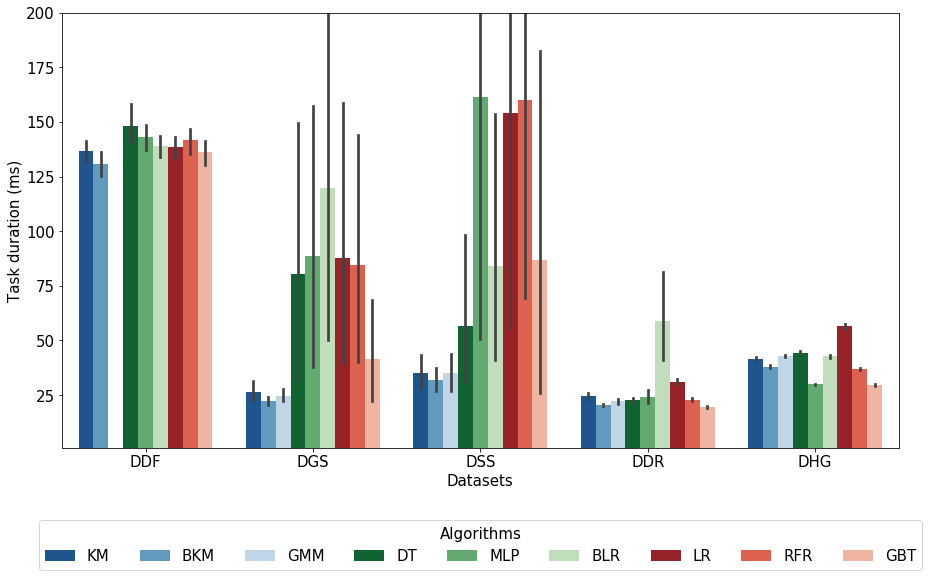

In [15]:
data = metrics
data = data[(data['phase'] == 'transform')].copy()
#data = data[data['shuffleFetchWaitTime'] == 0]

data['Datasets'] = data['dataset']

data = data.rename(columns={'duration': 'Task duration (ms)'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Task duration (ms)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
#plt.yscale('log')
plt.ylim((1, 200))

plt.savefig('stat1-prediction-task-duration.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

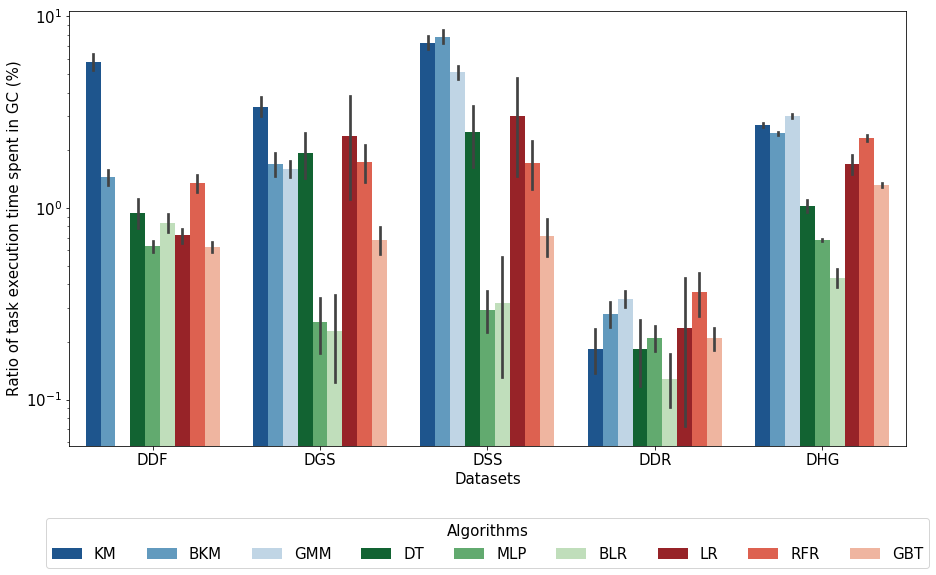

In [16]:
data = metrics
data = data[(data['phase'] == 'fit')].copy()
#data = data[data['shuffleFetchWaitTime'] == 0]

data['Datasets'] = data['dataset']

data['ratio'] = data['jvmGCTime'] / data['duration'] * 100
data = data.rename(columns={'ratio': 'Ratio of task execution time spent in GC (%)'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Ratio of task execution time spent in GC (%)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-training-task-gc.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

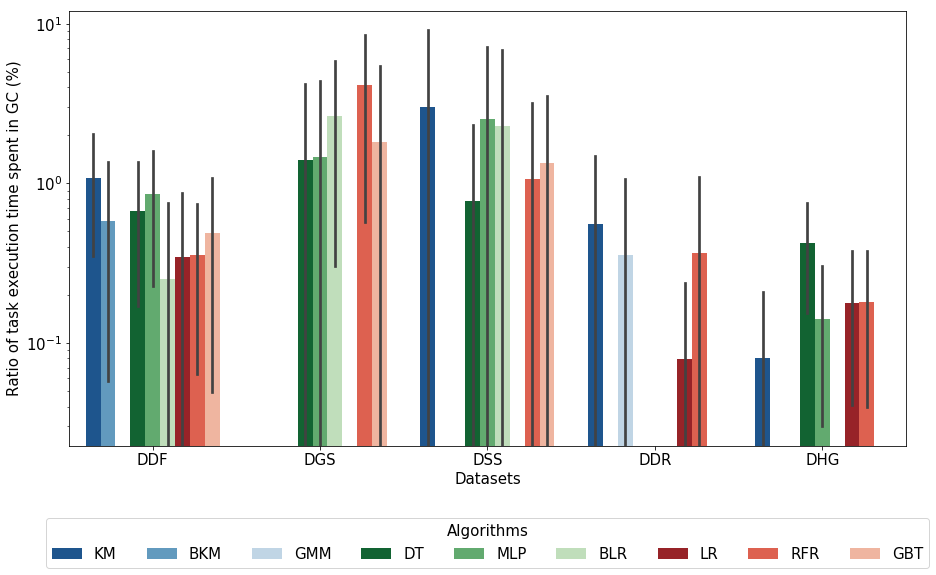

In [17]:
data = metrics
data = data[(data['phase'] == 'transform')].copy()
#data = data[data['shuffleFetchWaitTime'] == 0]

data['Datasets'] = data['dataset']

data['ratio'] = data['jvmGCTime'] / data['duration'] * 100
data = data.rename(columns={'ratio': 'Ratio of task execution time spent in GC (%)'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Ratio of task execution time spent in GC (%)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-prediction-task-gc.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

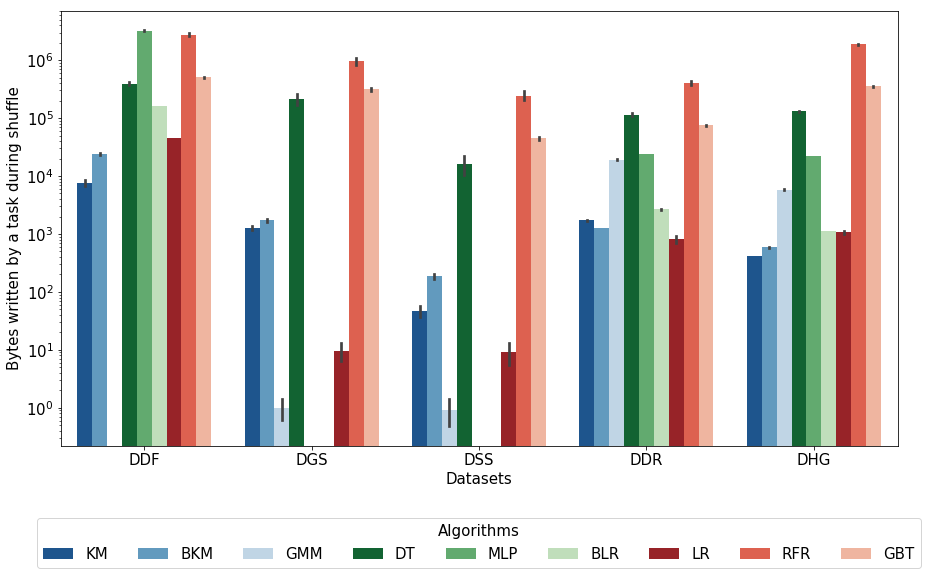

In [18]:
data = metrics
data = data[(data['phase'] == 'fit')].copy()
#data = data[data['shuffleFetchWaitTime'] == 0]

data['Datasets'] = data['dataset']

data = data.rename(columns={'shuffleBytesWritten': 'Bytes written by a task during shuffle'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Bytes written by a task during shuffle', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-training-task-bytes-written-shuffle.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

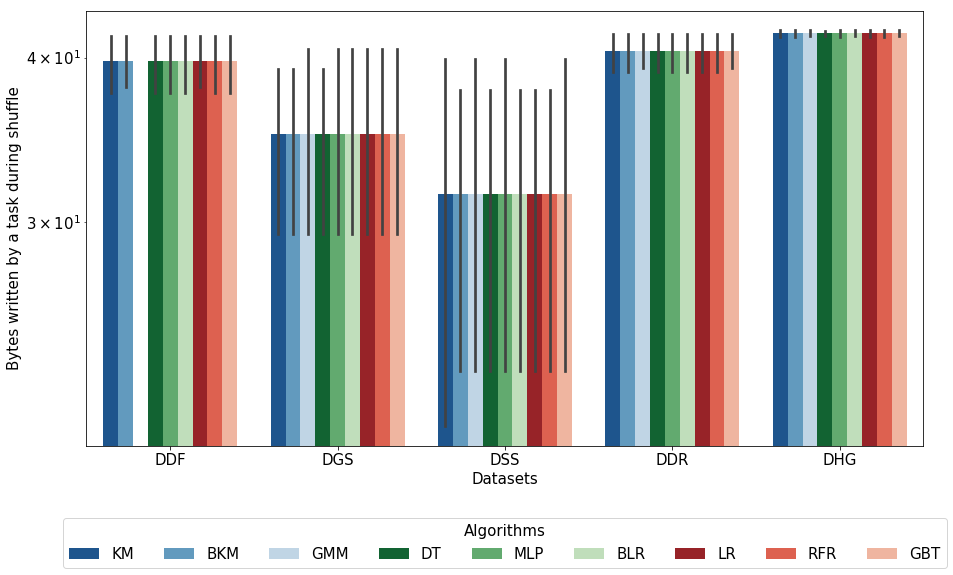

In [19]:
data = metrics
data = data[(data['phase'] == 'transform')].copy()
#data = data[data['shuffleFetchWaitTime'] == 0]

data['Datasets'] = data['dataset']

data = data.rename(columns={'shuffleBytesWritten': 'Bytes written by a task during shuffle'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Bytes written by a task during shuffle', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-prediction-task-bytes-written-shuffle.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

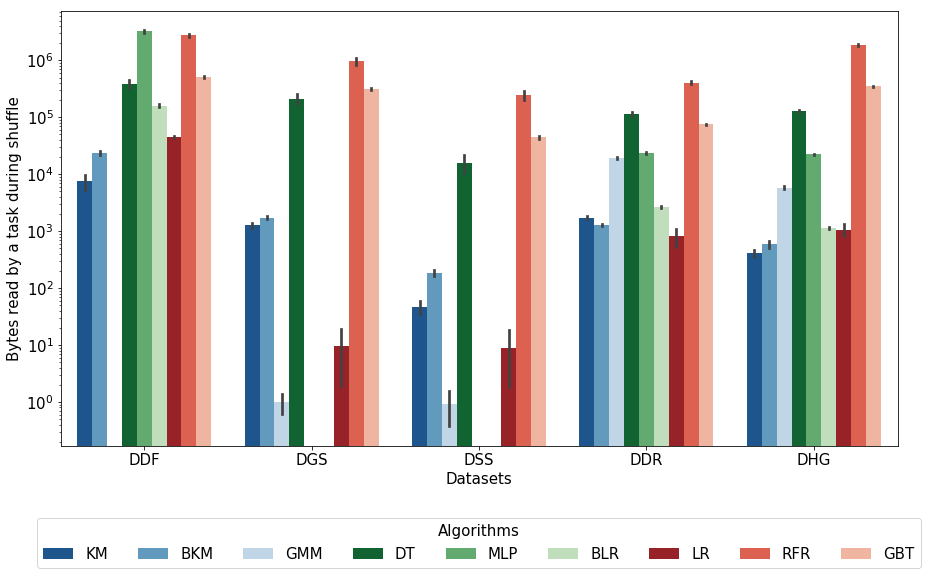

In [20]:
data = metrics
data = data[(data['phase'] == 'fit')].copy()
#data = data[data['shuffleFetchWaitTime'] == 0]

data['Datasets'] = data['dataset']

data = data.rename(columns={'shuffleTotalBytesRead': 'Bytes read by a task during shuffle'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Bytes read by a task during shuffle', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-training-task-bytes-read-shuffle.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

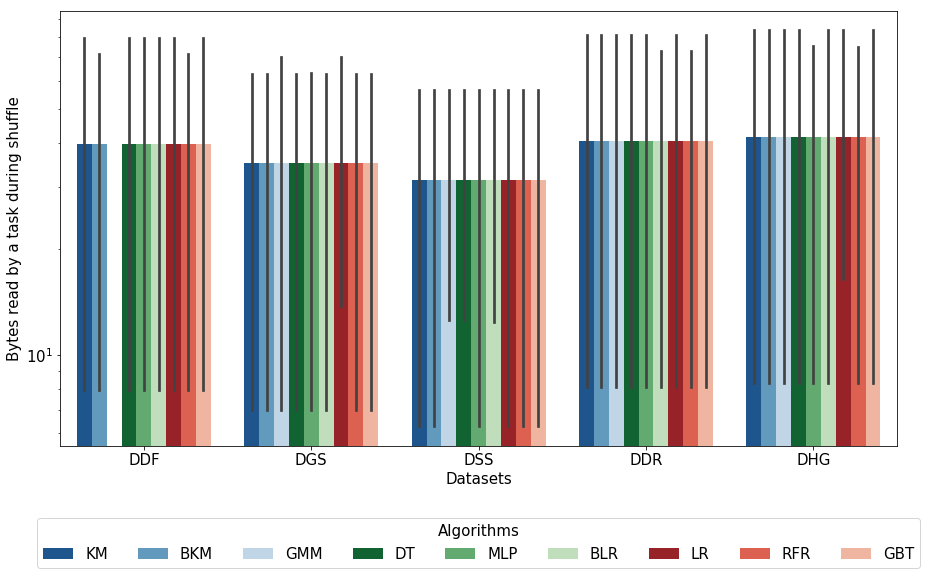

In [21]:
data = metrics
data = data[(data['phase'] == 'transform')].copy()
#data = data[data['shuffleTotalBytesRead'] != 0]

data['Datasets'] = data['dataset']

data = data.rename(columns={'shuffleTotalBytesRead': 'Bytes read by a task during shuffle'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Bytes read by a task during shuffle', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-prediction-task-bytes-read-shuffle.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

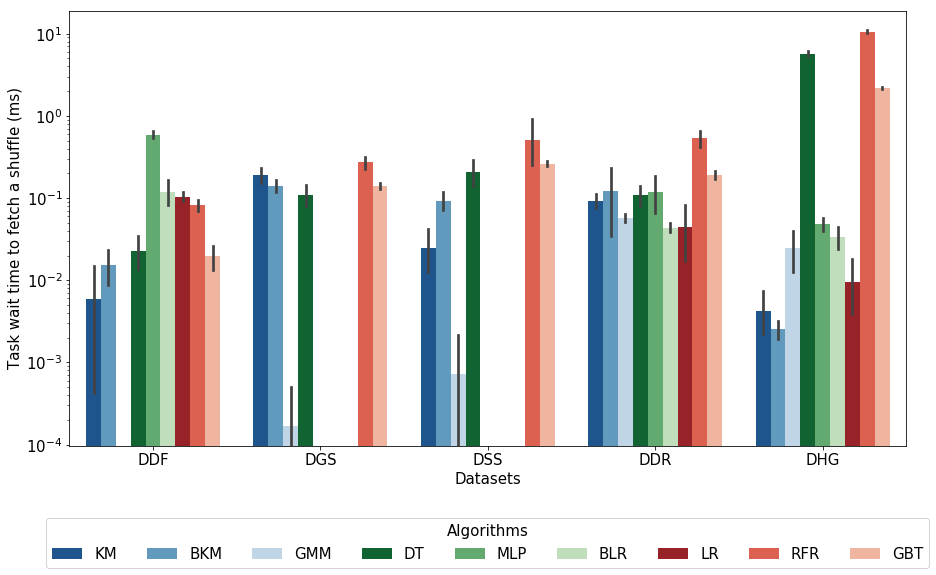

In [22]:
data = metrics
data = data[(data['phase'] == 'fit')].copy()
#data = data[data['shuffleFetchWaitTime'] != 0]

data['Datasets'] = data['dataset']

data = data.rename(columns={'shuffleFetchWaitTime': 'Task wait time to fetch a shuffle (ms)'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Task wait time to fetch a shuffle (ms)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-training-task-wait-time-fetch-shuffle.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

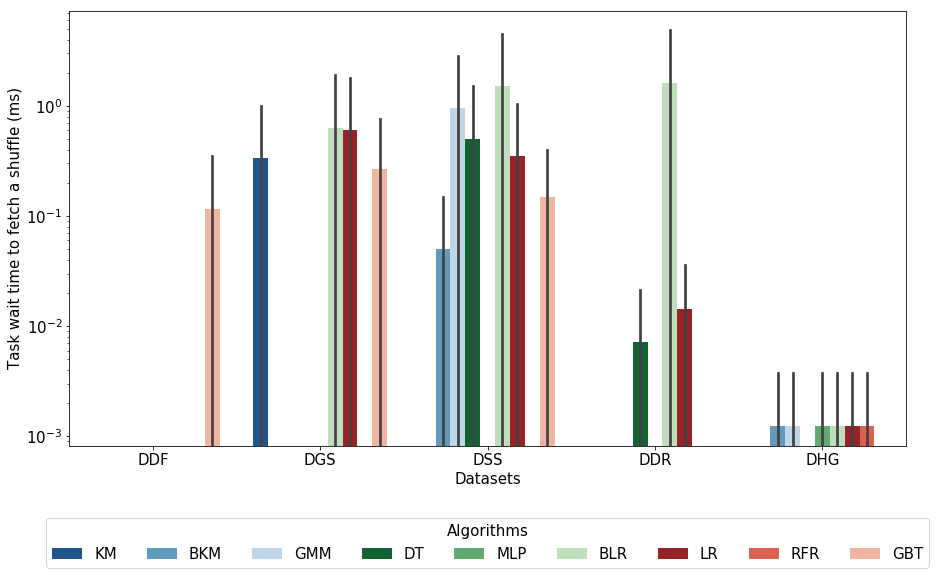

In [23]:
data = metrics
data = data[(data['phase'] == 'transform')].copy()
#data = data[data['shuffleFetchWaitTime'] != 0]

data['Datasets'] = data['dataset']

data = data.rename(columns={'shuffleFetchWaitTime': 'Task wait time to fetch a shuffle (ms)'})

plt.figure(figsize=(15, 8))
sns.barplot(x='Datasets', y='Task wait time to fetch a shuffle (ms)', hue='algorithm', data=data, hue_order=hue_order, order=order, palette=customcmap)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9, title='Algorithms')
plt.yscale('log')

plt.savefig('stat1-prediction-task-wait-time-fetch-shuffle.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

# System

In [8]:
nodes = {
    'master': 'Master',
    '0': 'Worker 1',
    '1': 'Worker 2',
    '2': 'Worker 3',
    '3': 'Worker 4'
}

system['Nodes'] = system['node'].map(nodes)

In [ ]:
system['NetIn'] = system['NetIn'] / 1000
system['NetOut'] = system['NetOut'] / 1000
system['MemUsed'] = (system['MemTotal'] - system['MemFree'])

In [ ]:
data = system
data = data[(data['algorithm'] == 'MLP') & (data['dataset'] == 'DHG') & (data['runId'] == 1)]
data = data.groupby(['algorithm', 'dataset', 'runId', 'node']).apply(lambda df: df.reset_index(drop=True).reset_index()).reset_index(drop=True)

data = data.rename(columns={'index': 'Time (s)', 'MemUsed': 'Used memory (KB)'})

plt.figure(figsize=(15, 8))
sns.lineplot(x='Time (s)', y='Used memory (KB)', data=data, hue='Nodes', legend=False, hue_order=nodes.values())
lgd = plt.gca().legend(nodes.values(), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title='Nodes')

plt.xlim(0, 232)

plt.savefig('stat1-training-used-memory.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
data = system
data = data[(data['algorithm'] == 'MLP') & (data['dataset'] == 'DHG') & (data['runId'] == 1)]
data = data.groupby(['algorithm', 'dataset', 'runId', 'node']).apply(lambda df: df.reset_index(drop=True).reset_index()).reset_index(drop=True)

data = data.rename(columns={'index': 'Time (s)', 'MemUsed': 'Used memory (KB)'})

plt.figure(figsize=(15, 8))
sns.lineplot(x='Time (s)', y='Used memory (KB)', data=data, hue='Nodes', legend=False, hue_order=nodes.values())
lgd = plt.gca().legend(nodes.values(), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title='Nodes')

plt.xlim(232, 245)

plt.savefig('stat1-prediction-used-memory.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
data = system
data = data[(data['algorithm'] == 'MLP') & (data['dataset'] == 'DHG') & (data['runId'] == 1) & (data['node'] == '0')]
data = data.groupby(['algorithm', 'dataset', 'runId', 'node']).apply(lambda df: df.reset_index(drop=True).reset_index()).reset_index(drop=True)

data = data.rename(columns={'index': 'Time (s)', 'CpuUsage': 'Used CPU (%)'})

plt.figure(figsize=(15, 8))
sns.lineplot(x='Time (s)', y='Used CPU (%)', data=data, hue='Nodes', hue_order=nodes.values())
lgd = plt.gca().legend(list(nodes.values())[1:2], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, title='Nodes')
plt.ylim(0, 100)

plt.xlim(0, 232)

plt.savefig('stat1-training-used-cpu.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
data = system
data = data[(data['algorithm'] == 'MLP') & (data['dataset'] == 'DHG') & (data['runId'] == 1)]
data = data.groupby(['algorithm', 'dataset', 'runId', 'node']).apply(lambda df: df.reset_index(drop=True).reset_index()).reset_index(drop=True)

data = data.rename(columns={'index': 'Time (s)', 'CpuUsage': 'Used CPU (%)'})

plt.figure(figsize=(15, 8))
sns.lineplot(x='Time (s)', y='Used CPU (%)', data=data, hue='Nodes', hue_order=nodes.values())
lgd = plt.gca().legend(list(nodes.values())[1:2], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, title='Nodes')
plt.ylim(0, 100)

plt.xlim(232, 245)

plt.savefig('stat1-prediction-used-cpu.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
data = system
data = data[(data['algorithm'] == 'MLP') & (data['dataset'] == 'DHG') & (data['runId'] == 1) & ((data['node'] == 'master')|((data['node'] == '0')))]
data = data.groupby(['algorithm', 'dataset', 'runId', 'node']).apply(lambda df: df.reset_index(drop=True).reset_index()).reset_index(drop=True)

data = data.rename(columns={'index': 'Time (s)', 'NetIn': 'Network incoming data (KB)'})

plt.figure(figsize=(15, 8))
sns.lineplot(x='Time (s)', y='Network incoming data (KB)', data=data, hue='Nodes', hue_order=nodes.values())
lgd = plt.gca().legend(list(nodes.values())[0:2], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, title='Nodes')
plt.yscale('log')


plt.xlim(0, 232)

plt.savefig('stat1-training-network-in.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
data = system
data = data[(data['algorithm'] == 'MLP') & (data['dataset'] == 'DHG') & (data['runId'] == 1) & ((data['node'] == 'master')|((data['node'] == '0')))]
data = data.groupby(['algorithm', 'dataset', 'runId', 'node']).apply(lambda df: df.reset_index(drop=True).reset_index()).reset_index(drop=True)

data = data.rename(columns={'index': 'Time (s)', 'NetIn': 'Network incoming data (KB)'})

plt.figure(figsize=(15, 8))
sns.lineplot(x='Time (s)', y='Network incoming data (KB)', data=data, hue='Nodes', hue_order=nodes.values())
lgd = plt.gca().legend(list(nodes.values())[0:2], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, title='Nodes')
plt.yscale('log')


plt.xlim(232, 245)

plt.savefig('stat1-prediction-network-in.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
data = system
data = data[(data['algorithm'] == 'MLP') & (data['dataset'] == 'DHG') & (data['runId'] == 1) & ((data['node'] == 'master')|((data['node'] == '0')))]
data = data.groupby(['algorithm', 'dataset', 'runId', 'node']).apply(lambda df: df.reset_index(drop=True).reset_index()).reset_index(drop=True)

data = data.rename(columns={'index': 'Time (s)', 'NetOut': 'Network outgoing data (KB)'})

plt.figure(figsize=(15, 8))
sns.lineplot(x='Time (s)', y='Network outgoing data (KB)', data=data, hue='Nodes', hue_order=nodes.values())
lgd = plt.gca().legend(list(nodes.values())[0:2], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, title='Nodes')
plt.yscale('log')

plt.xlim(0, 232)

plt.savefig('stat1-training-network-out.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
data = system
data = data[(data['algorithm'] == 'MLP') & (data['dataset'] == 'DHG') & (data['runId'] == 1) & ((data['node'] == 'master')|((data['node'] == '0')))]
data = data.groupby(['algorithm', 'dataset', 'runId', 'node']).apply(lambda df: df.reset_index(drop=True).reset_index()).reset_index(drop=True)

data = data.rename(columns={'index': 'Time (s)', 'NetOut': 'Network outgoing data (KB)'})

plt.figure(figsize=(15, 8))
sns.lineplot(x='Time (s)', y='Network outgoing data (KB)', data=data, hue='Nodes', hue_order=nodes.values())
lgd = plt.gca().legend(list(nodes.values())[0:2], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, title='Nodes')
plt.yscale('log')

plt.xlim(232, 245)

plt.savefig('stat1-prediction-network-out.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
data = system
data = data[(data['algorithm'] == 'MLP') & (data['dataset'] == 'DHG') & (data['runId'] == 1)]
data = data.groupby(['algorithm', 'dataset', 'runId', 'node']).apply(lambda df: df.reset_index(drop=True).reset_index()).reset_index(drop=True)

data = data.rename(columns={'index': 'Time (s)', 'DiskWrites': 'Disk writes (KB)'})

plt.figure(figsize=(15, 8))
sns.lineplot(x='Time (s)', y='Disk writes (KB)', data=data, hue='Nodes', hue_order=nodes.values())
lgd = plt.gca().legend(nodes.values(), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title='Nodes')
plt.yscale('log')

plt.xlim(0, 232)

plt.savefig('stat1-training-disk-write.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
data = system
data = data[(data['algorithm'] == 'MLP') & (data['dataset'] == 'DHG') & (data['runId'] == 1)]
data = data.groupby(['algorithm', 'dataset', 'runId', 'node']).apply(lambda df: df.reset_index(drop=True).reset_index()).reset_index(drop=True)

data = data.rename(columns={'index': 'Time (s)', 'DiskWrites': 'Disk writes (KB)'})

plt.figure(figsize=(15, 8))
sns.lineplot(x='Time (s)', y='Disk writes (KB)', data=data, hue='Nodes', hue_order=nodes.values())
lgd = plt.gca().legend(nodes.values(), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, title='Nodes')
plt.yscale('log')

plt.xlim(232, 245)

plt.savefig('stat1-prediction-disk-write.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
data = metrics
data = data[(data['algorithm'] == 'RFR') & (data['dataset'] == 'DHG') & (data['runId'] == 1) & (data['phase'] == 'fit')]

maximum = data['finishTime'].max()
minimum = data['launchTime'].min()
num = 1_000

print((maximum - minimum) / num)

bins = np.linspace(minimum, maximum, num=num, endpoint=False, dtype=int)
som = [0] * len(bins)
tot = [0] * len(bins)

In [ ]:
for _, task in tqdm(data.iterrows(), total=len(data)):
    
    for i in range(0, len(bins)):
        
        low = bins[i]
        high = bins[i + 1] if i + 1 < len(bins) else 10**15

        if low <= task['launchTime'] < high:
        
            som[i] += task['schedulerDelay']
            tot[i] += 1
            
            break

assert sum(tot) == len(data)

res = np.array(som) / np.array(tot)
res[np.isnan(res)] = 0

In [ ]:
df = pd.DataFrame({'time': bins, 'res': res})
df['time'] = (df['time'] - df['time'].min()) / 1000

In [ ]:
stag = data.groupby(['stageId']).agg({"finishTime": 'max', 'launchTime': 'min'})
stag['size'  ] = (stag['finishTime'] - stag['launchTime']) / 2 * 0.99
stag['center'] = stag['size'] + stag['launchTime']

jobs = data.groupby(['jobId']).agg({"finishTime": 'max', 'launchTime': 'min'})
jobs['size'  ] = (jobs['finishTime'] - jobs['launchTime']) / 2  * 0.99
jobs['center'] = jobs['size'] + jobs['launchTime']

df = df.rename(columns={'res': 'Scheduler delay (ms)', 'time': 'Time (s)'})

plt.figure(figsize=(15, 8))

sns.lineplot(x="Time (s)", y="Scheduler delay (ms)", data=df, ci=None)

plt.gca().errorbar(x=(stag['center'] - data['launchTime'].min()) / 1000 , y=np.array([35] * len(stag)), xerr=stag['size'] / 1000, fmt='.', markersize=0)
plt.gca().errorbar(x=(jobs['center'] - data['launchTime'].min()) / 1000 , y=np.array([37] * len(jobs)), xerr=jobs['size'] / 1000, fmt='.', markersize=0)

lgd = plt.legend((
    'tasks ({})'.format(len(data)),
    'stages ({})'.format(len(stag)),
    'jobs ({})'.format(len(jobs))
), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, title='Spark steps')

plt.savefig('dynamic-training.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
stag = data.groupby(['stageId']).agg({"finishTime": 'max', 'launchTime': 'min'})
stag['size'  ] = (stag['finishTime'] - stag['launchTime']) / 2
stag['center'] = stag['size'] + stag['launchTime']

jobs = data.groupby(['jobId']).agg({"finishTime": 'max', 'launchTime': 'min'})
jobs['size'  ] = (jobs['finishTime'] - jobs['launchTime']) / 2 
jobs['center'] = jobs['size'] + jobs['launchTime']

df = df.rename(columns={'res': 'Execution time (ms)', 'time': 'Time (s)'})

plt.figure(figsize=(40, 20))

sns.lineplot(x="Time (s)", y="Execution time (ms)", data=df, ci=None)

plt.gca().errorbar(x=(stag['center'] - data['launchTime'].min()) / 1000 , y=np.array([6] * len(stag)), xerr=stag['size'] / 1000, fmt='.', markersize=0)
plt.gca().errorbar(x=(jobs['center'] - data['launchTime'].min()) / 1000 , y=np.array([8] * len(jobs)), xerr=jobs['size'] / 1000, fmt='.', markersize=0)

lgd = plt.legend((
    'tasks ({})'.format(len(data)),
    'stages ({})'.format(len(stag)),
    'jobs ({})'.format(len(jobs))
), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, title='Spark steps')

plt.savefig('dynamic-prediction.eps', format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

# Miscellaneous

In [131]:
metrics['schedulerDelay'] + metrics['executorRunTime'] + metrics['executorDeserializeTime'] + metrics['resultSerializationTime'] + metrics['gettingResultTime']

0

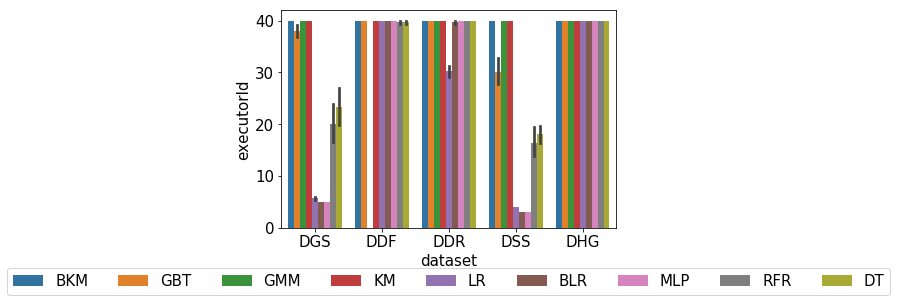

In [109]:
data = metrics
data = data[(data['phase'] == 'fit')]
data = data.groupby(['dataset', 'algorithm', 'runId']).agg({'executorId': 'nunique'}).reset_index()

sns.barplot(x='dataset', y='executorId', hue='algorithm', data=data)
lgd = plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=9)

# Higgs

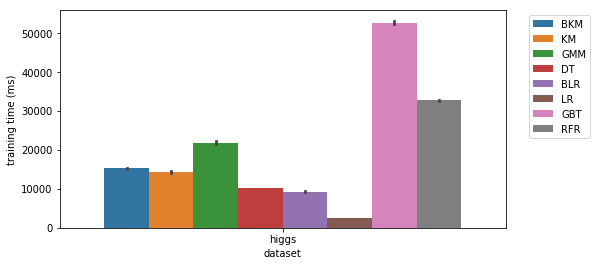

In [235]:
data = metrics
data = data[(data['phase'] == 'fit') & (data['platformId'] == 0)]
data = data.groupby(['scenarioId', 'runId']).agg({'fitTime': 'first', 'dataset': 'first', 'algorithm': 'first', 'trainCount': 'first'}).reset_index()

#data['time'] = data['fitTime'] / data['trainCount']

data = data.rename(columns={'fitTime': 'training time (ms)'})

plt.figure(figsize=(8, 4))
sns.barplot(
    x='dataset', y='training time (ms)', hue='algorithm', data=data,
    hue_order=['BKM', 'KM', 'GMM', 'DT', 'BLR', 'LR', 'GBT', 'RFR']
)
plt.gca().legend(loc='upper right', bbox_to_anchor=(1.2, 1.00))

plt.savefig('stat1-training-time.png')

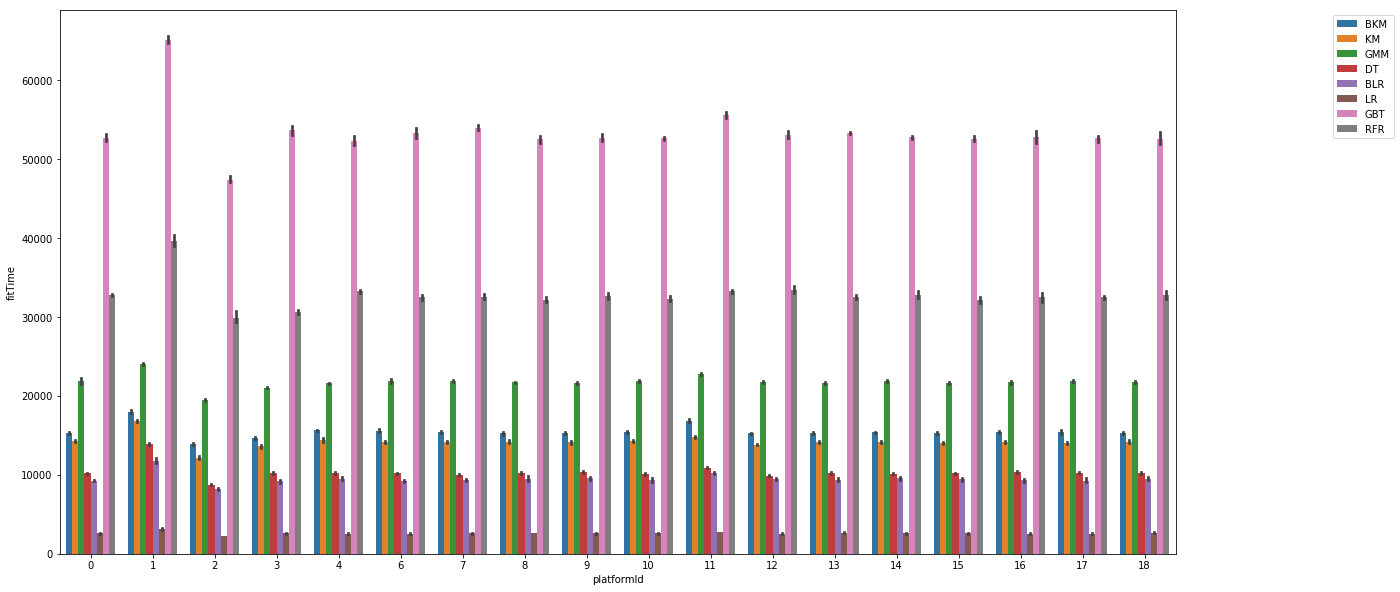

In [240]:
data = metrics
data = data[(data['phase'] == 'fit')]
data = data.groupby(['scenarioId', 'runId']).agg({'fitTime': 'first', 'dataset': 'first', 'algorithm': 'first', 'platformId': 'first'}).reset_index()

plt.figure(figsize=(20, 10))
sns.barplot(
    x='platformId', y='fitTime', hue='algorithm', data=data,
    hue_order=['BKM', 'KM', 'GMM', 'DT', 'BLR', 'LR', 'GBT', 'RFR']
)
plt.gca().legend(loc='upper right', bbox_to_anchor=(1.1, 1.00))

In [8]:
metrics[metrics['platformId'] == 0]['platform'].head().values[0]

"{'spark.serializer': 'org.apache.spark.serializer.JavaSerializer', 'spark.dynamicAllocation.enabled': 'false', 'spark.shuffle.file.buffer': '32k', 'spark.driver.memory': '5g', 'spark.shuffle.compress': 'true', 'spark.io.compression.codec': 'snappy', 'spark.master': 'spark://master:7077', 'spark.storage.memoryFraction': '0.6', 'spark.reducer.maxSizeInFlight': '48m', 'spark.shuffle.spill.compress': 'true', 'spark.shuffle.io.preferDirectBufs': 'true', 'spark.executor.memory': '5g', 'spark.rdd.compress': 'false', 'spark.driver.cores': '2', 'spark.executor.cores': '4'}"

In [9]:
metrics[metrics['platformId'] == 3]['platform'].head().values[0]

"{'spark.serializer': 'org.apache.spark.serializer.JavaSerializer', 'spark.dynamicAllocation.enabled': 'false', 'spark.shuffle.file.buffer': '32k', 'spark.driver.memory': '5g', 'spark.shuffle.compress': 'true', 'spark.io.compression.codec': 'snappy', 'spark.master': 'spark://master:7077', 'spark.storage.memoryFraction': '0.6', 'spark.reducer.maxSizeInFlight': '48m', 'spark.shuffle.spill.compress': 'true', 'spark.shuffle.io.preferDirectBufs': 'true', 'spark.executor.memory': '2g', 'spark.rdd.compress': 'false', 'spark.driver.cores': '2', 'spark.executor.cores': '4'}"

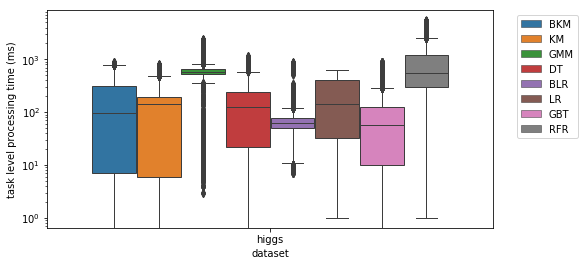

In [228]:
data = metrics
data = data[(data['phase'] == 'fit') & (data['platformId'] == 0)]

data = data.rename(columns={'executorRunTime': 'task level processing time (ms)'})

plt.figure(figsize=(8, 4))
sns.boxplot(
    x='dataset', y='task level processing time (ms)', hue='algorithm', data=data,
    hue_order=['BKM', 'KM', 'GMM', 'DT', 'BLR', 'LR', 'GBT', 'RFR'],
    linewidth=1
)
plt.gca().legend(loc='upper right', bbox_to_anchor=(1.2, 1.00))
plt.yscale('log')

plt.savefig('stat1-task-level-processing-time.png')

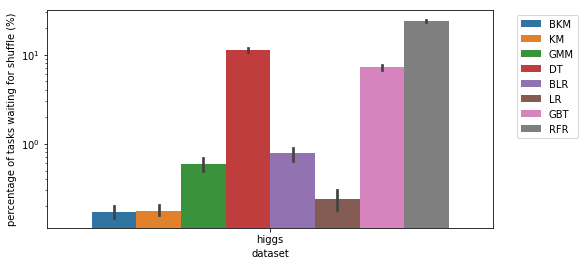

In [221]:
data = metrics
data = data[(data['phase'] == 'fit') & (data['platformId'] == 0)]
data = data.groupby(['dataset', 'algorithm', 'runId']).apply(lambda df: pd.Series({'percentage of tasks waiting for shuffle (%)': 100*(df['shuffleFetchWaitTime'] != 0).sum() / len(df['shuffleFetchWaitTime'])})).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(
    x='dataset', y='percentage of tasks waiting for shuffle (%)', hue='algorithm', data=data,
    hue_order=['BKM', 'KM', 'GMM', 'DT', 'BLR', 'LR', 'GBT', 'RFR']
)
plt.gca().legend(loc='upper right', bbox_to_anchor=(1.2, 1.00))
plt.yscale('log')
plt.savefig('stat1-percent-tasks-wait-shuffle.png')

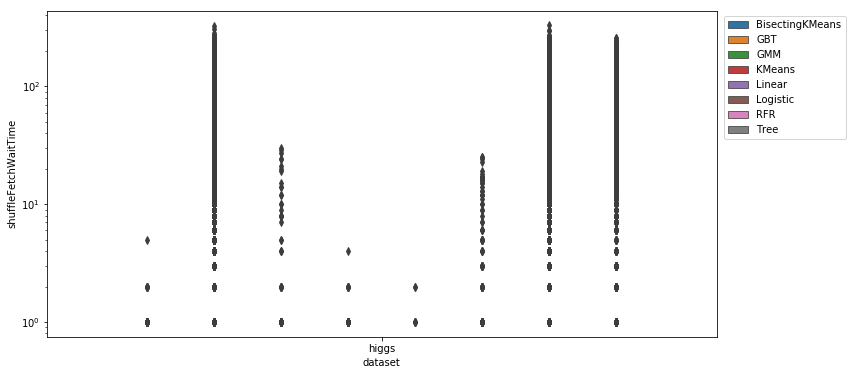

In [164]:
data = metrics
data = data[(data['phase'] == 'fit') & (data['platformId'] == 0)]

#data = data.rename(columns={'executorRunTime': 'task level processing time (ms)'})

plt.figure(figsize=(12, 6))
sns.boxplot(x='dataset', y='shuffleFetchWaitTime', hue='algorithm', data=data)
plt.gca().legend(loc='upper right', bbox_to_anchor=(1.2, 1.00))
plt.yscale('log')


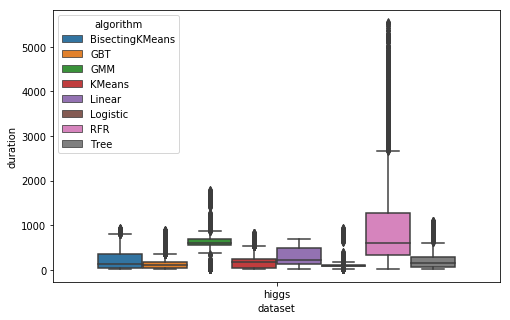

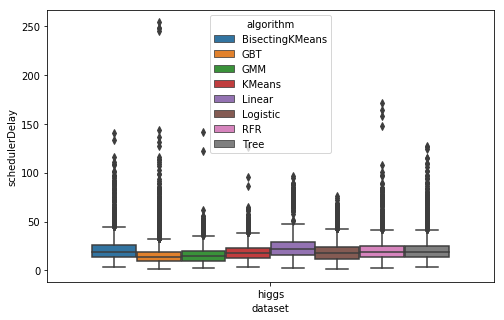

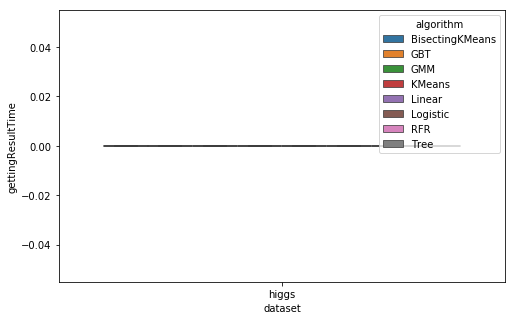

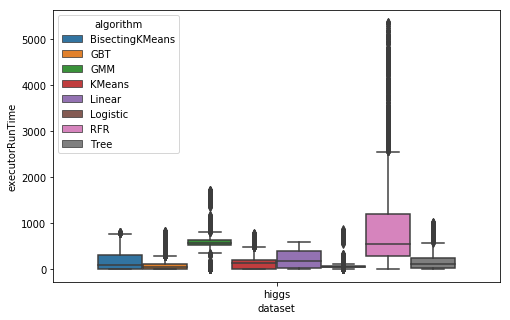

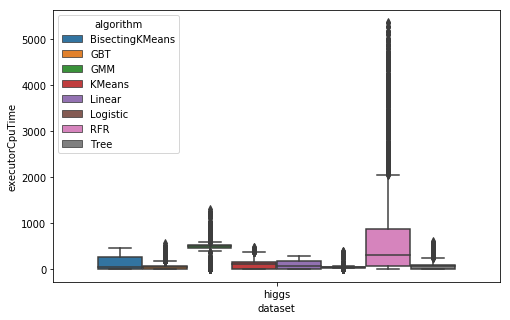

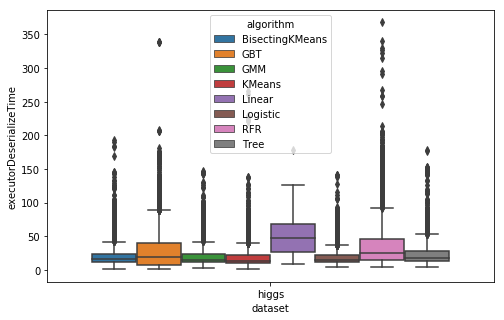

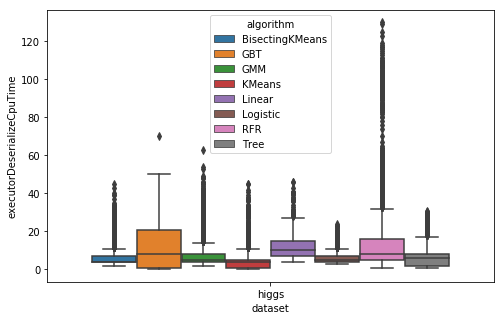

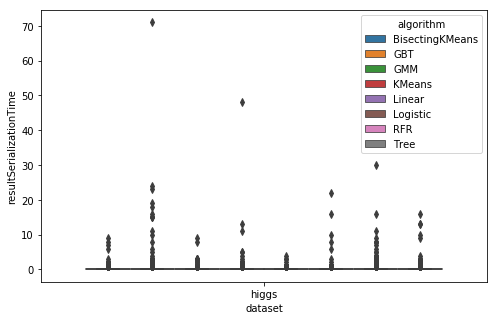

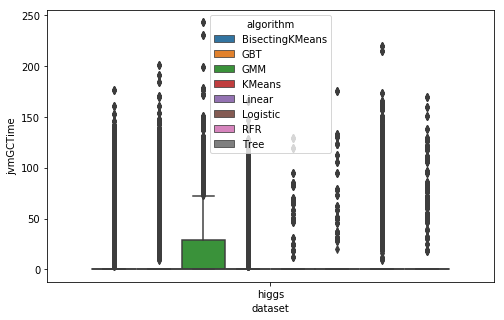

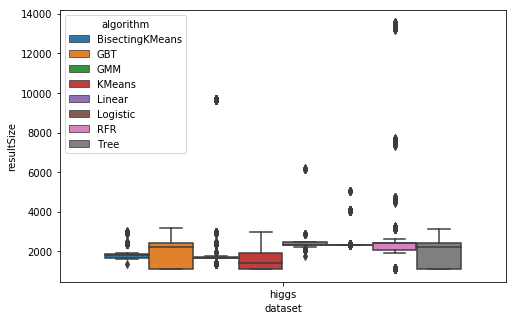

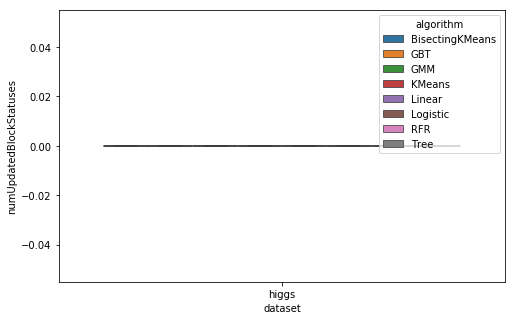

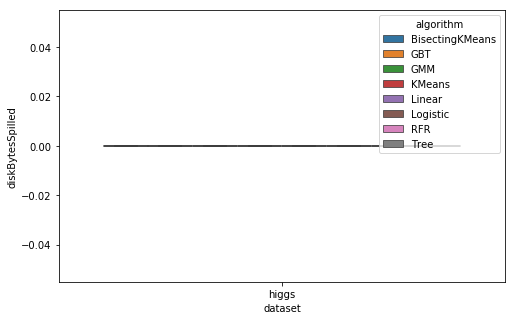

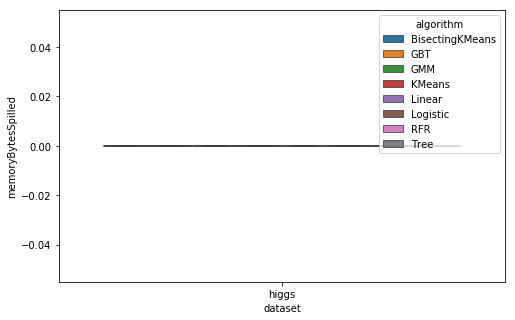

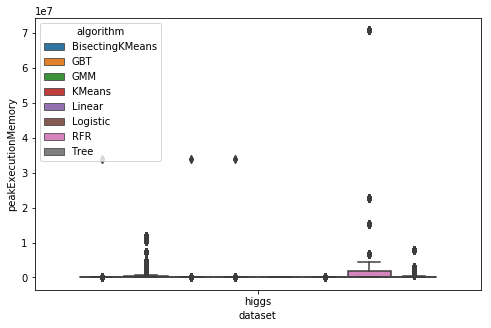

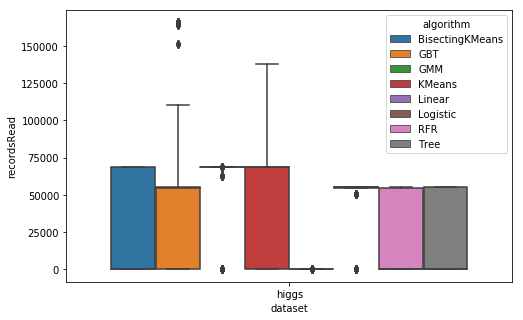

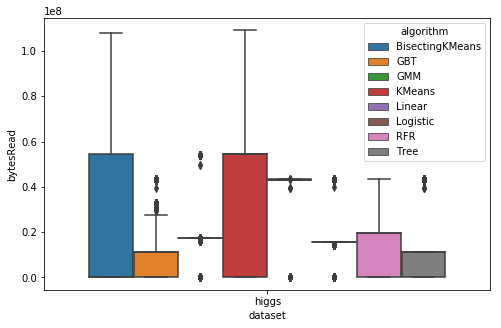

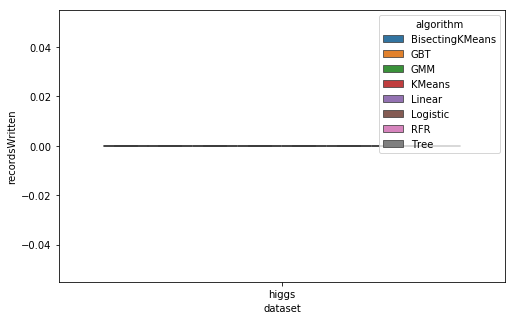

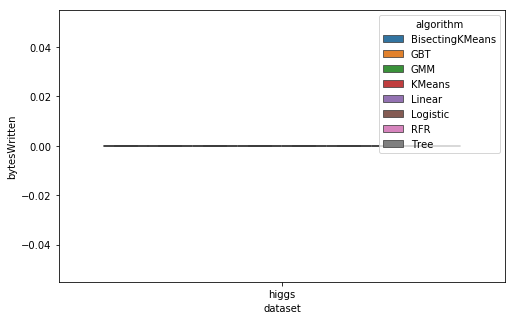

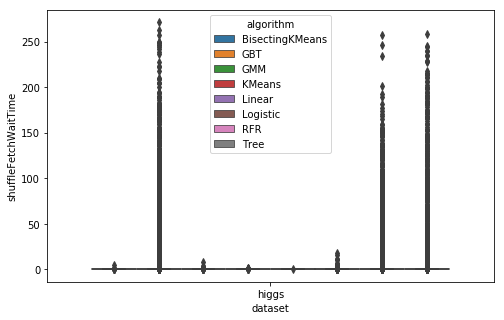

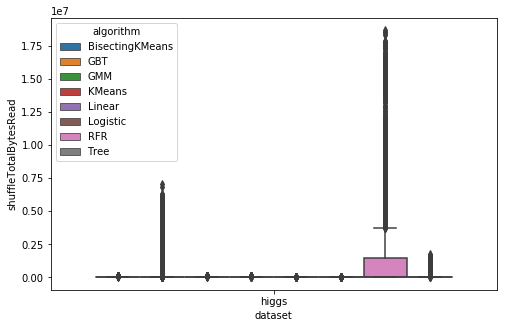

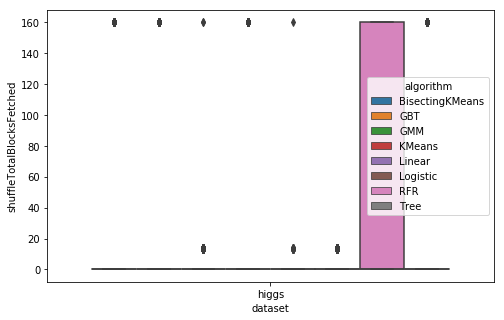

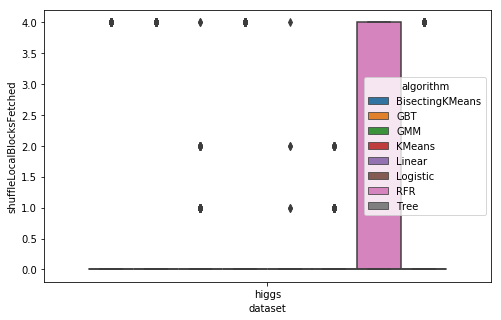

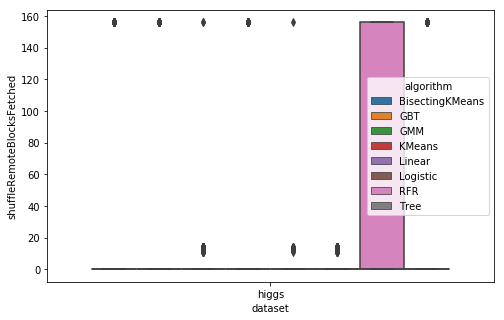

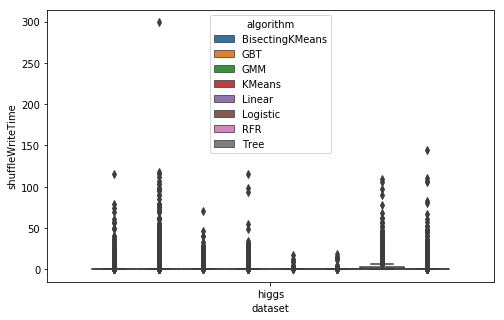

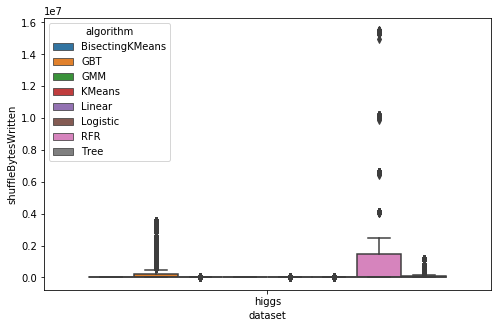

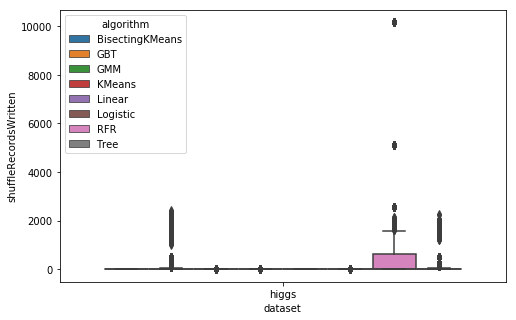

In [40]:
data = metrics
data = data[(data['phase'] == 'fit') & (data['runId'] == 1) & (data['platformId'] == 0)]

for y in spark:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='dataset', y=y, hue='algorithm', data=data)
    plt.show()

In [ ]:
metrics['algorithm'].value_counts().index

In [ ]:
from tqdm import tqdm

In [ ]:
data = metrics
data = data[(data['phase'] == 'fit') & (data['runId'] == 1) & (data['dataset'] == 'higgs')]

plt.figure(figsize=(30*26, 15))

for i, y in enumerate(tqdm(spark)):
    plt.subplot(len(spark), 1, i + 1)
    sns.boxplot(x='platformId', y=y, hue='algorithm', data=data)

plt.show()

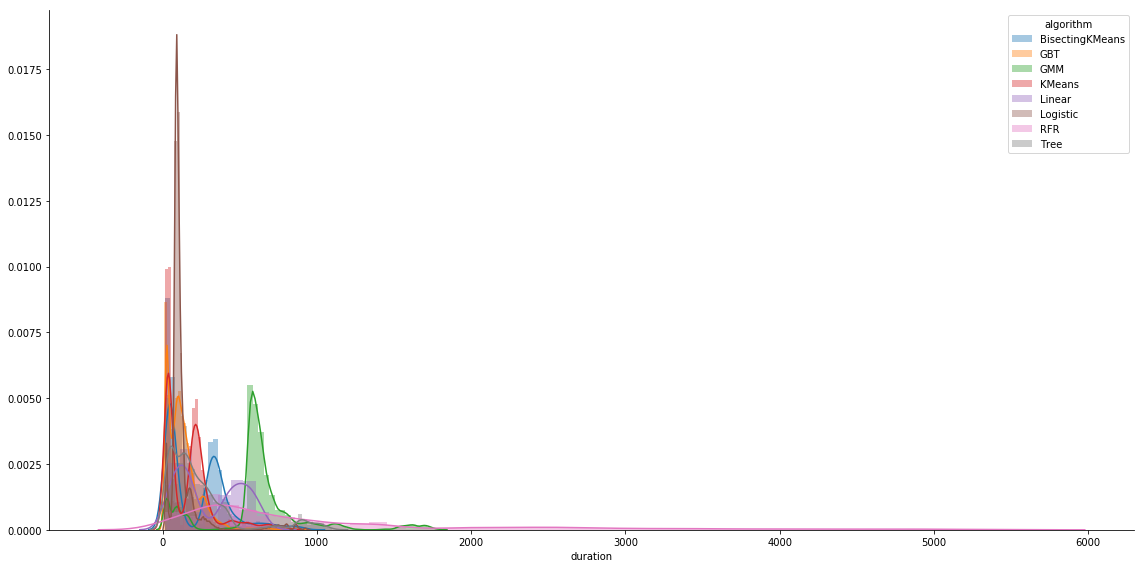

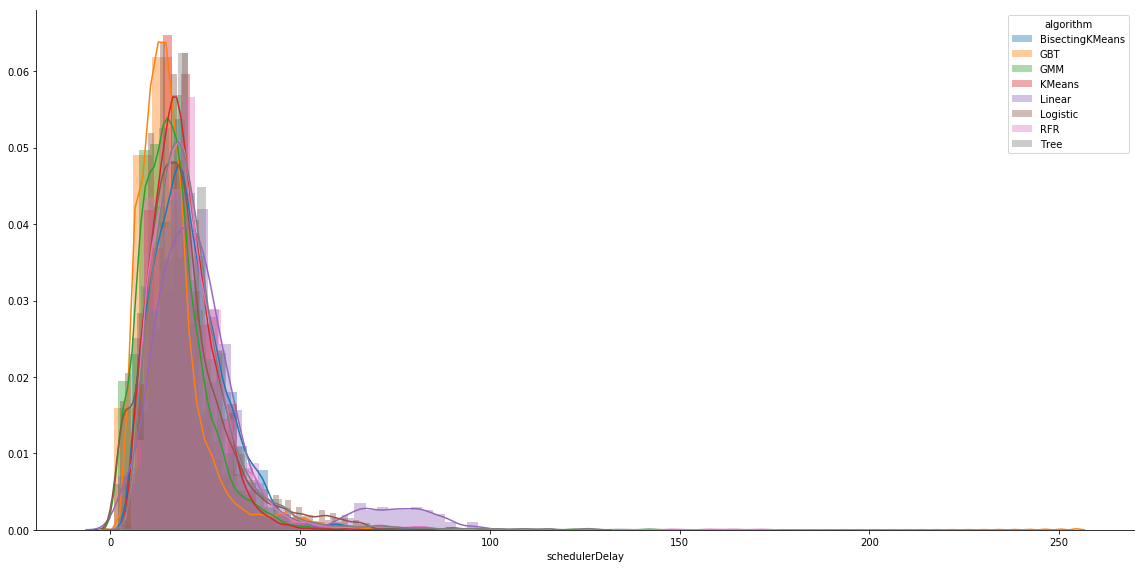

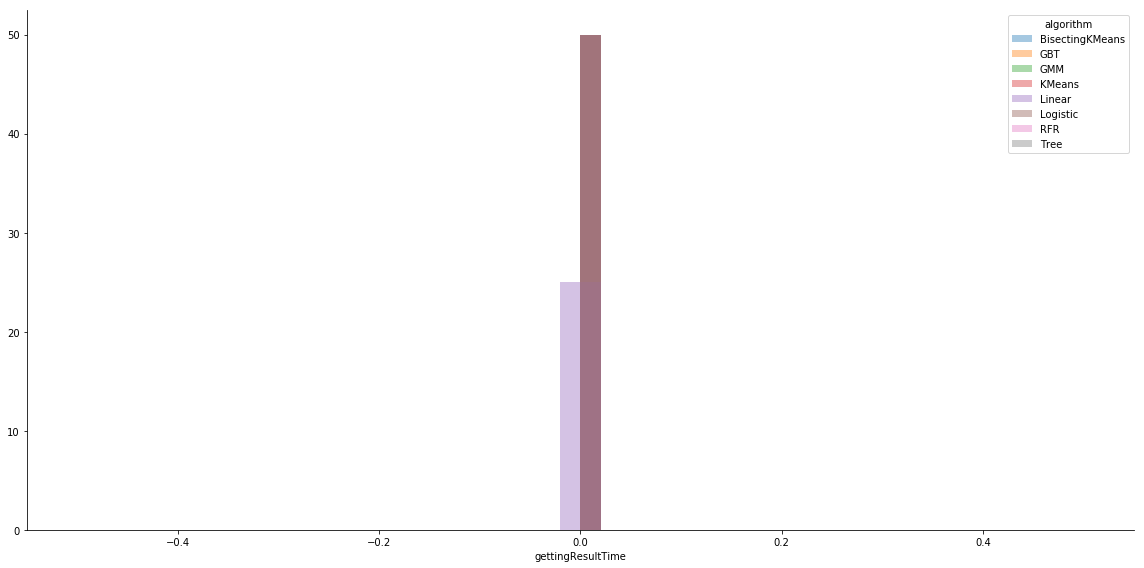

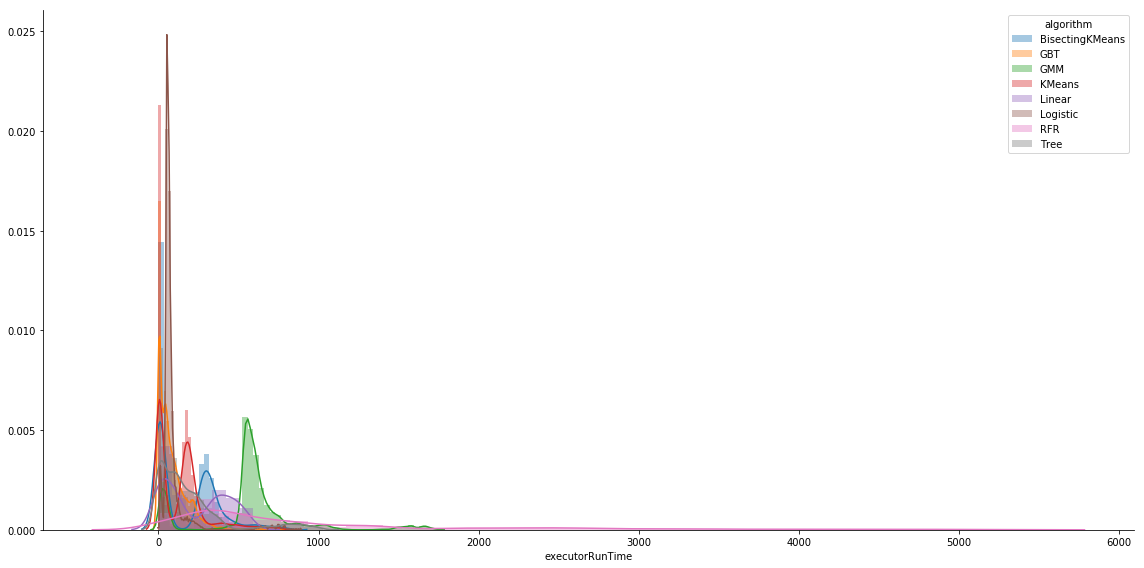

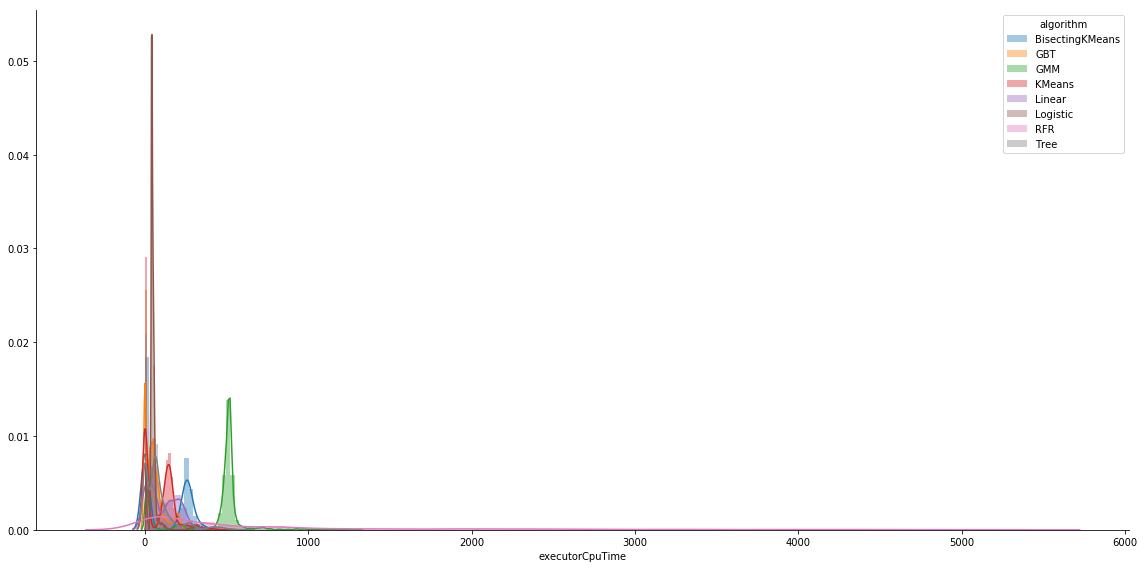

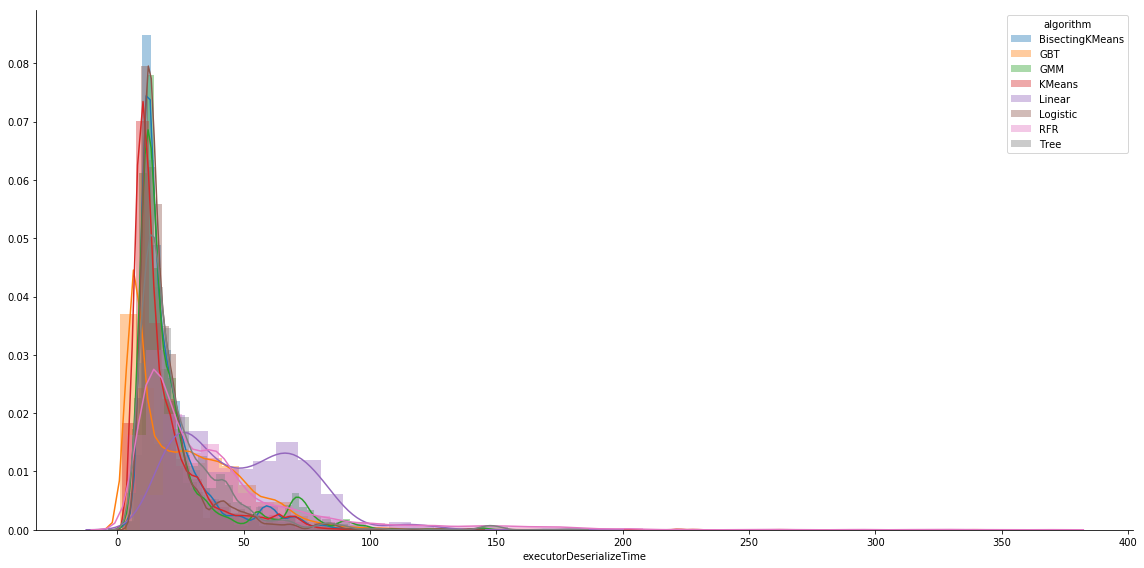

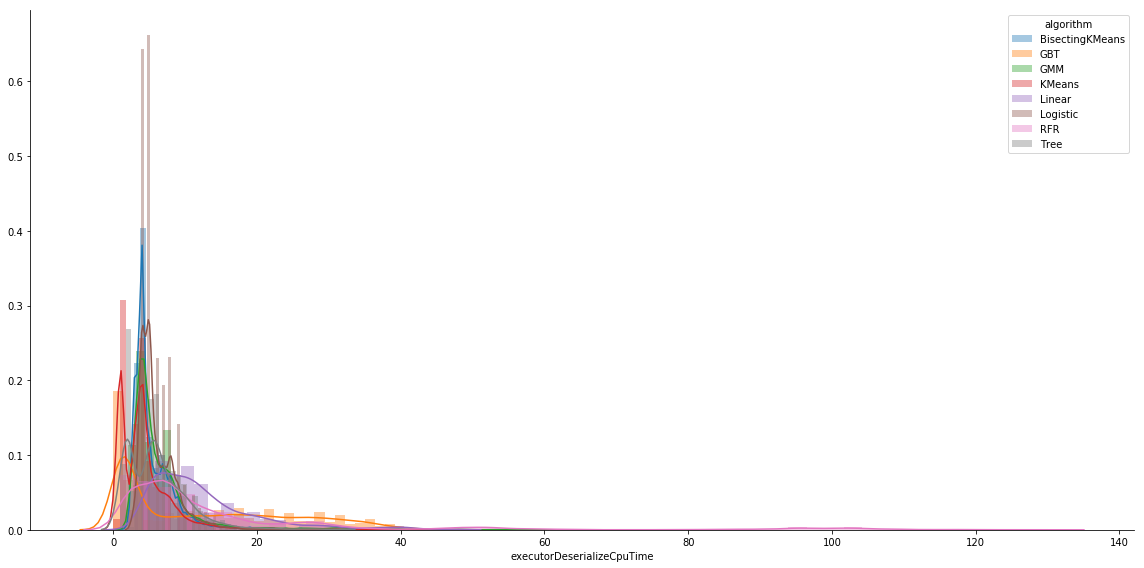

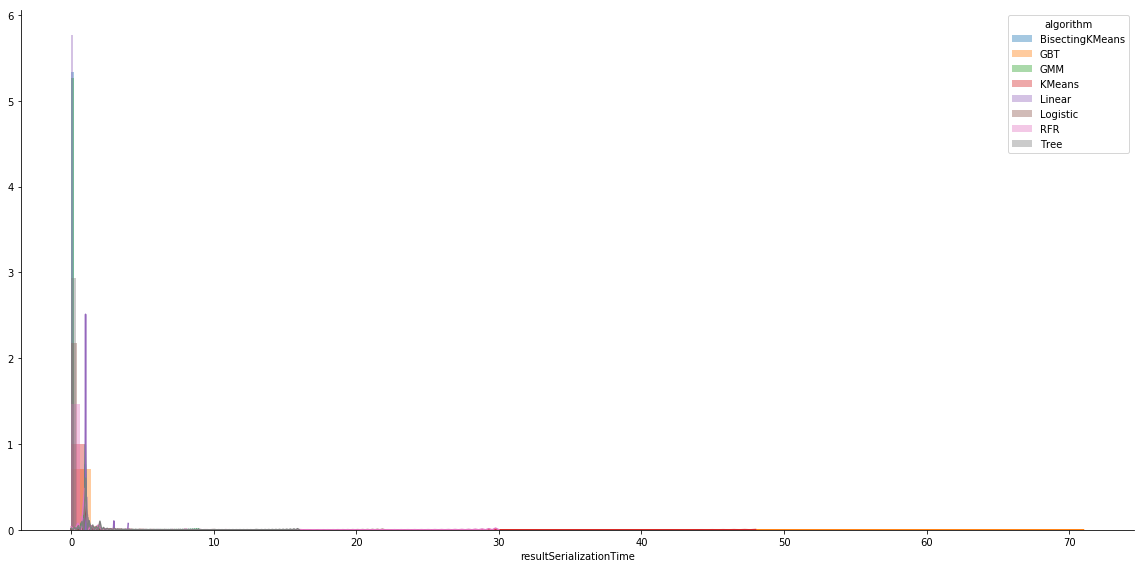

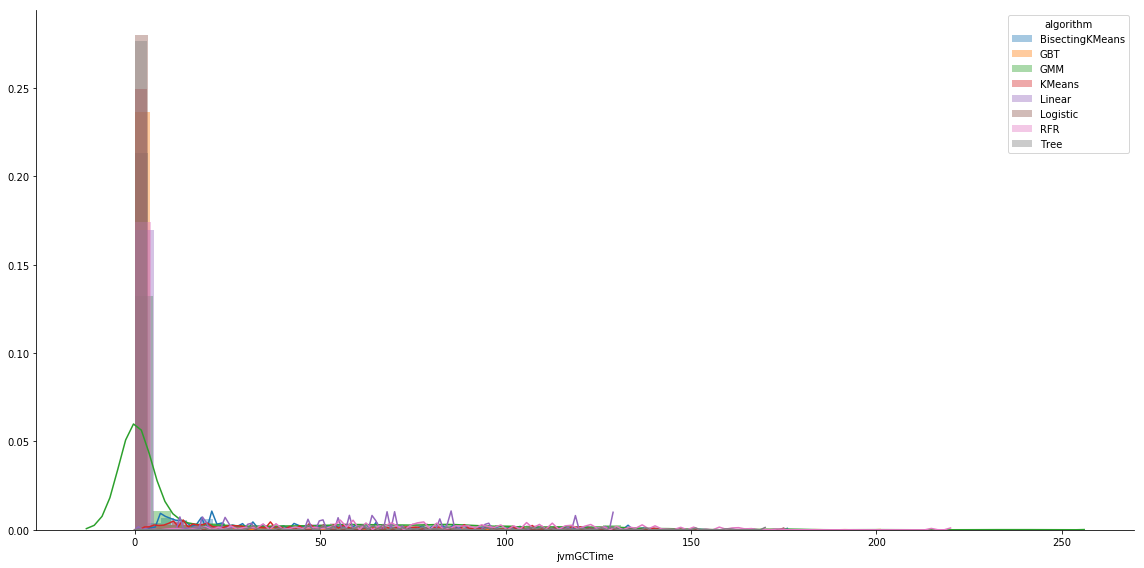

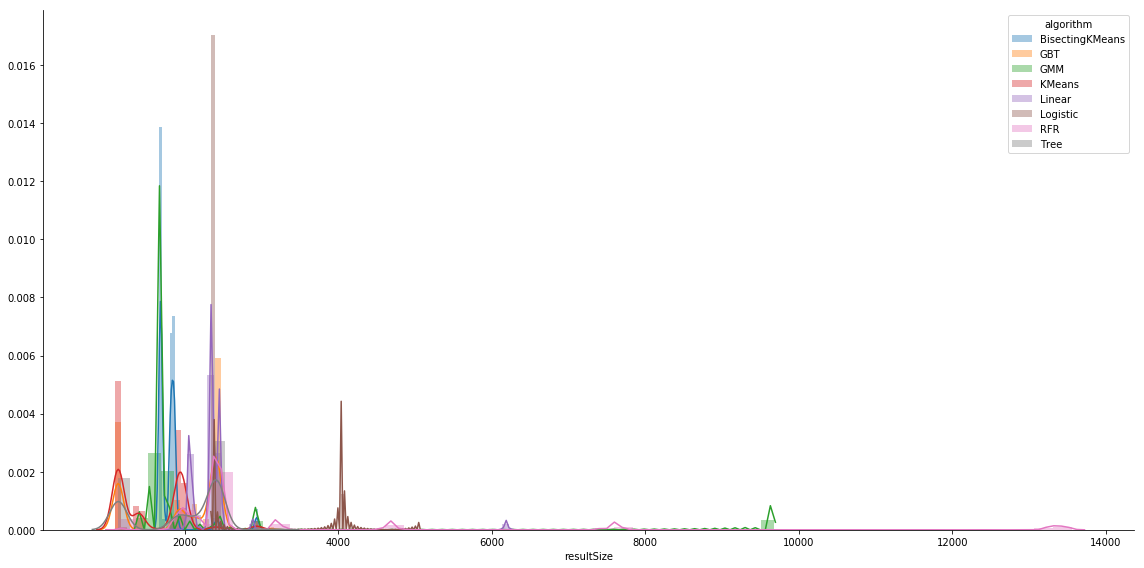

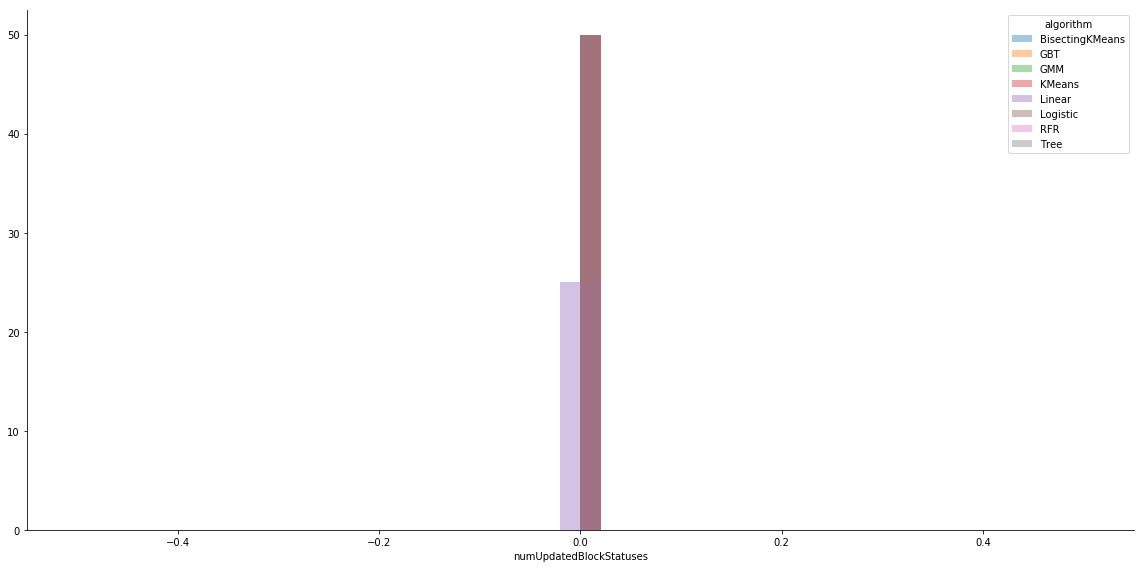

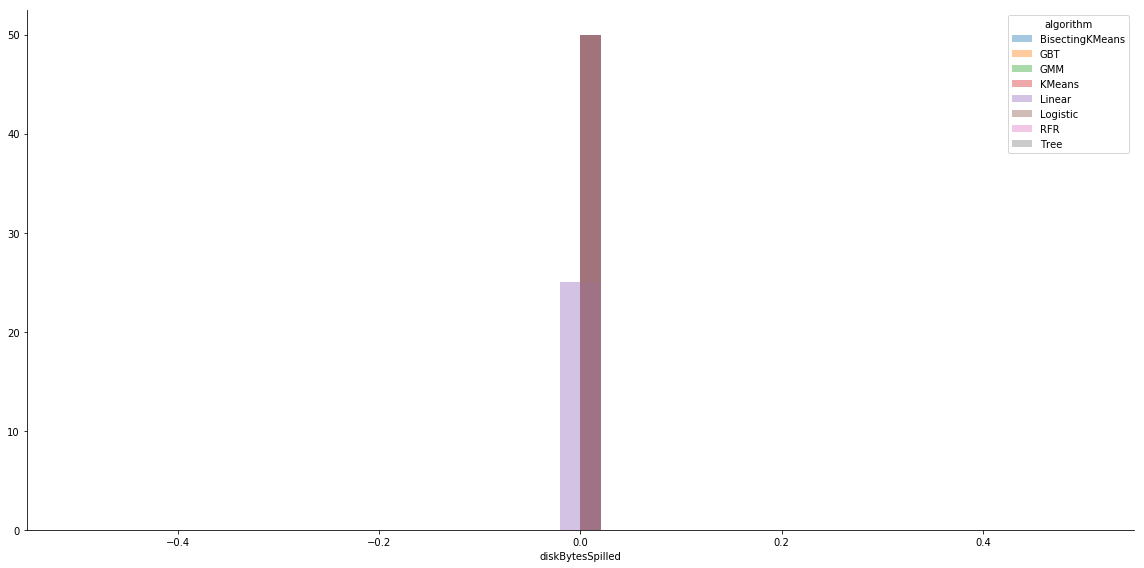

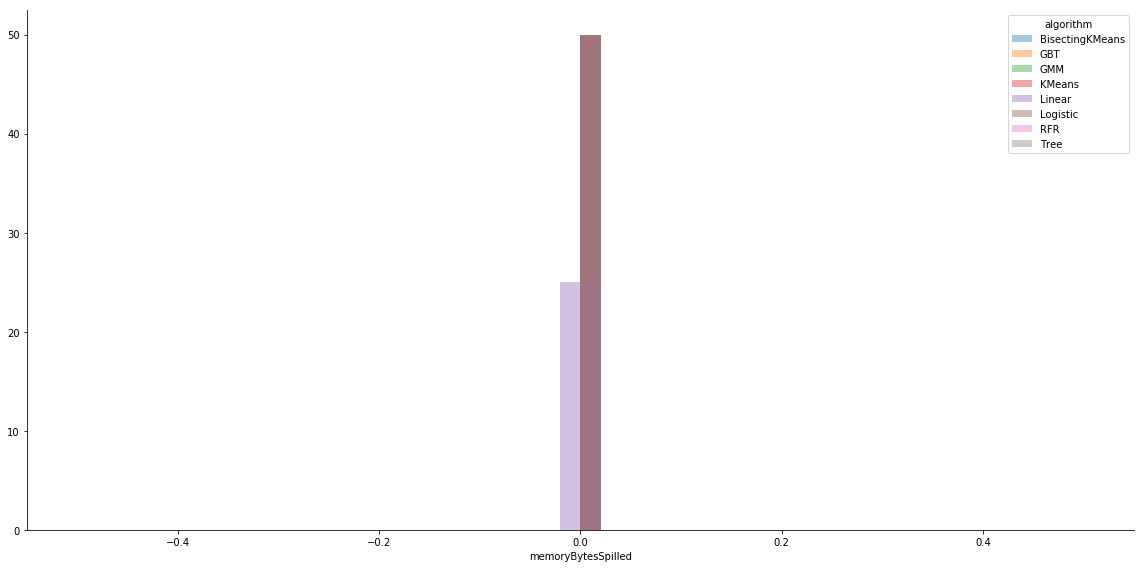

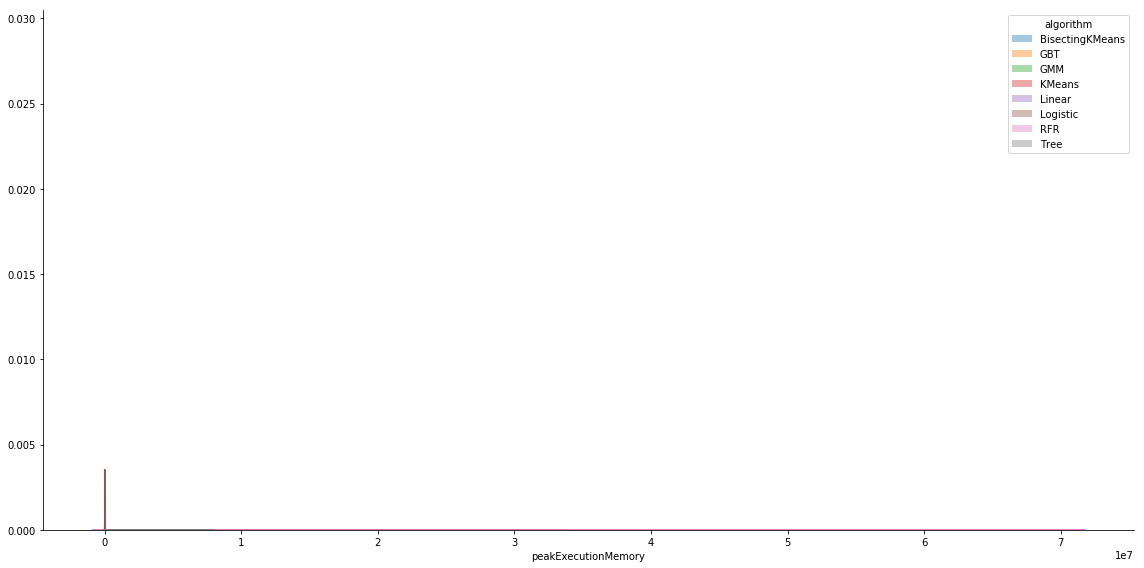

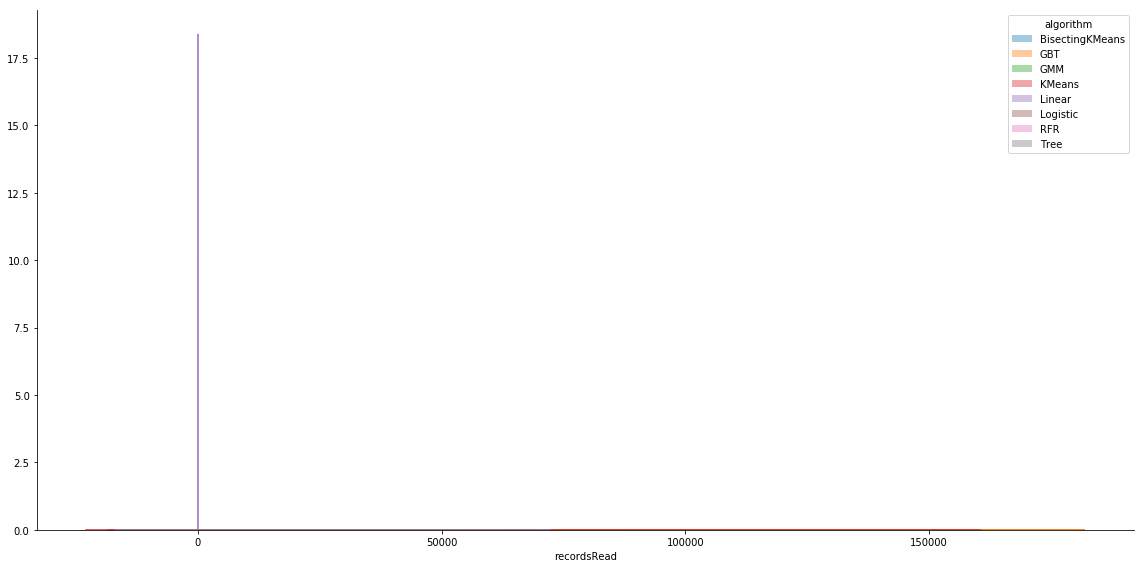

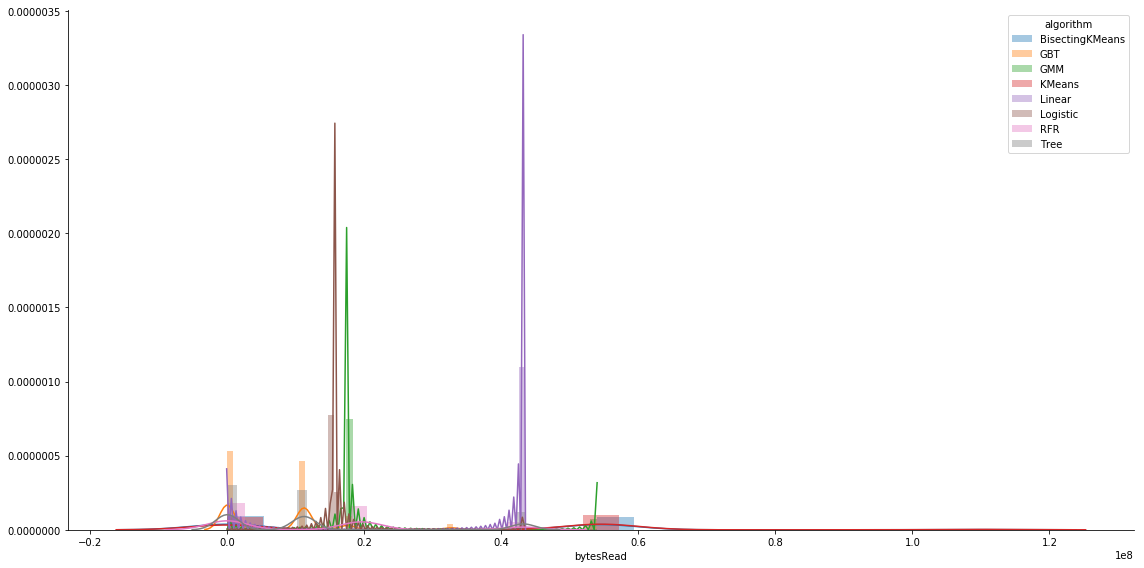

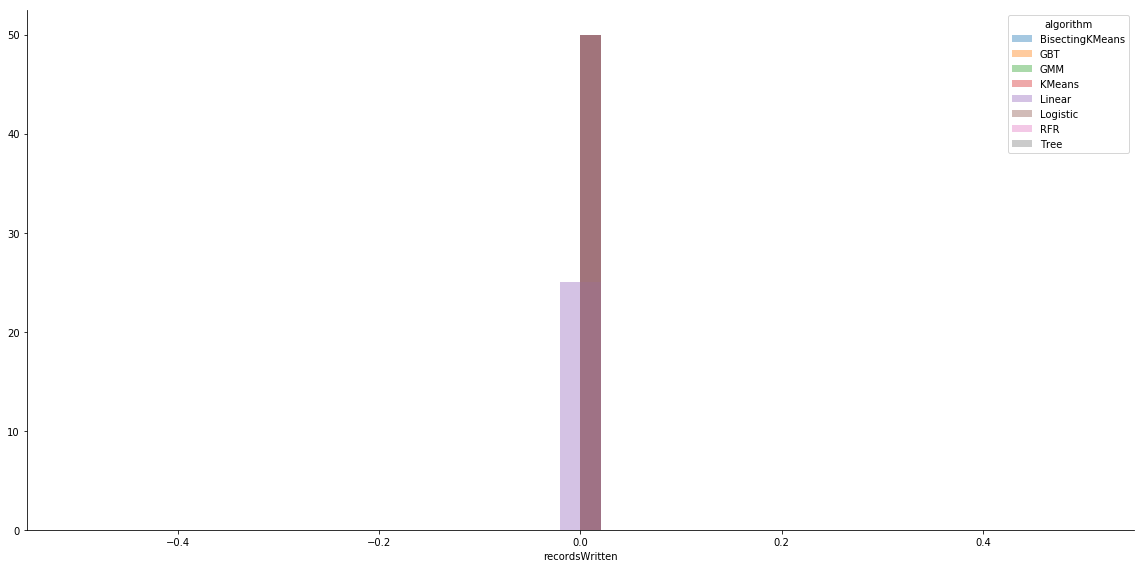

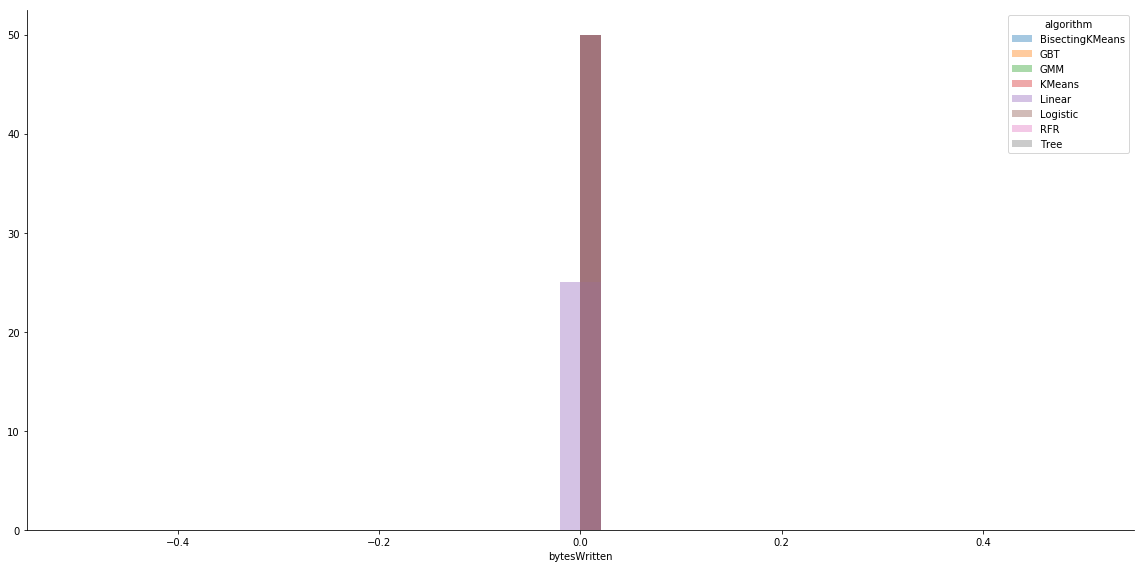

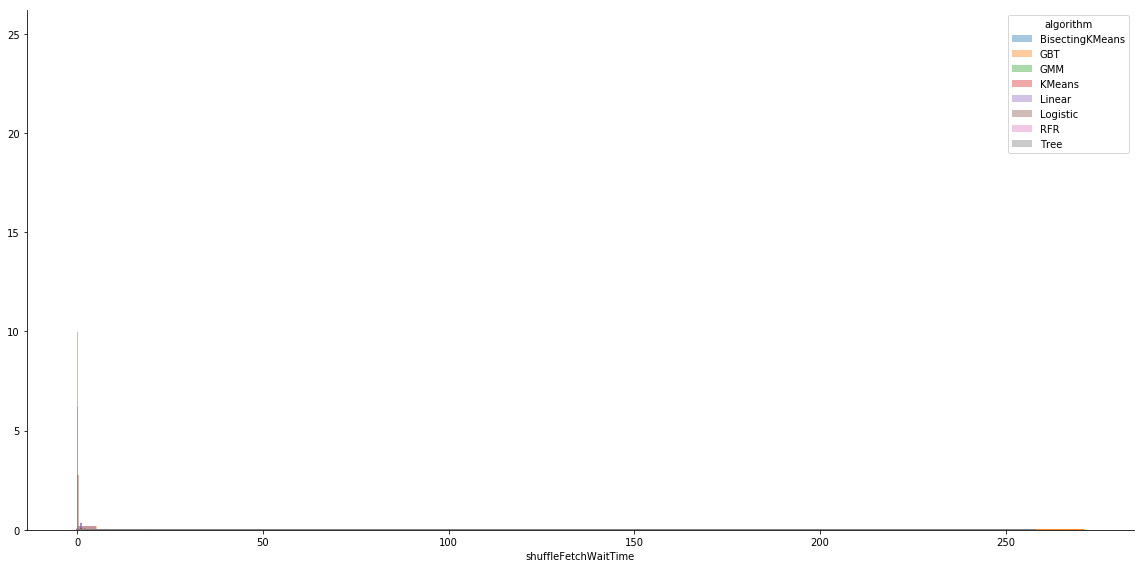

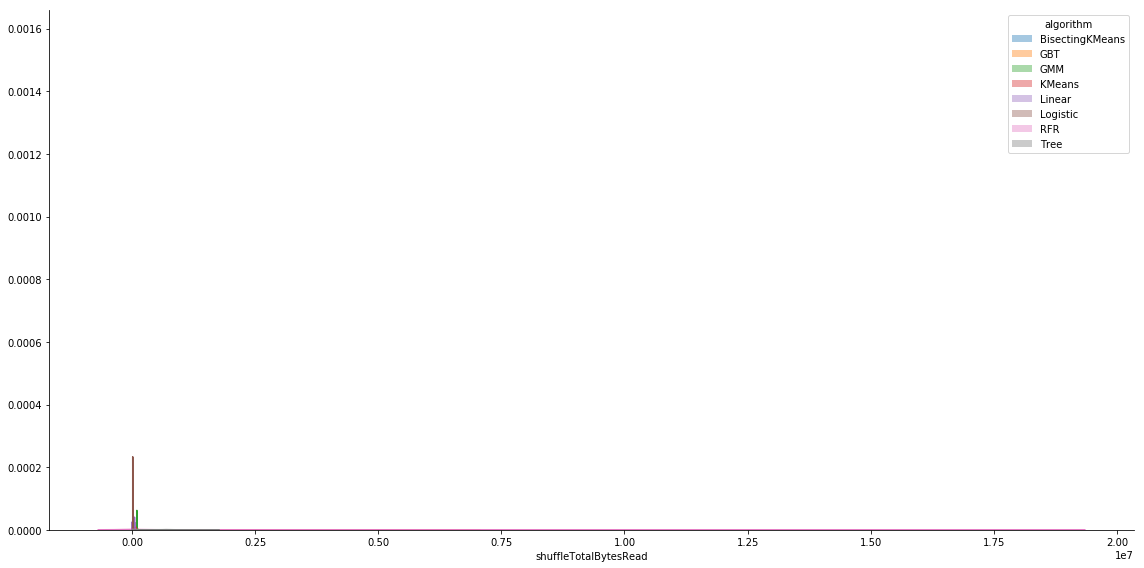

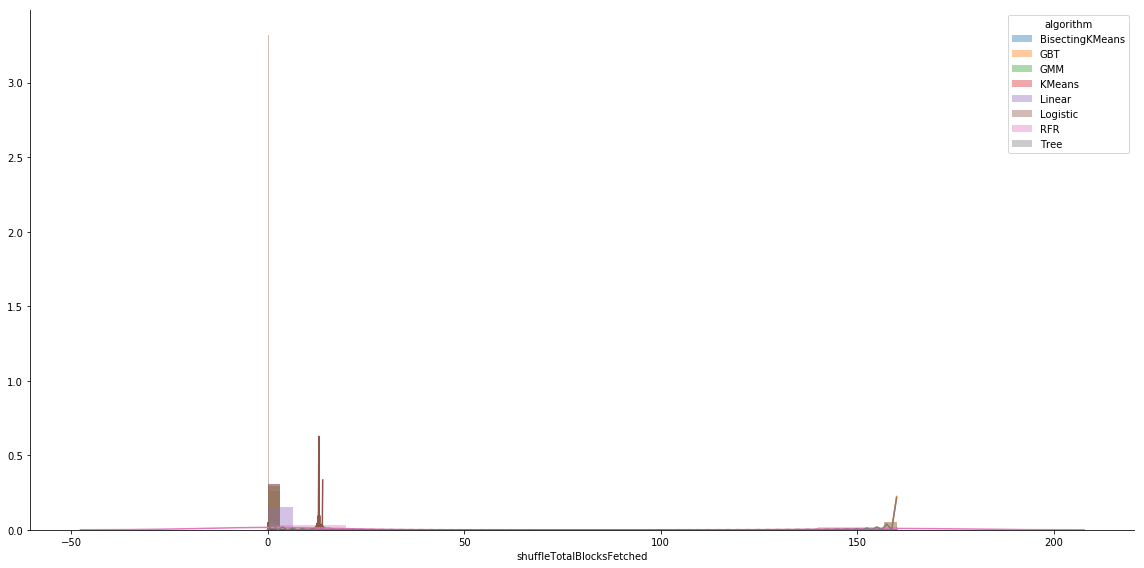

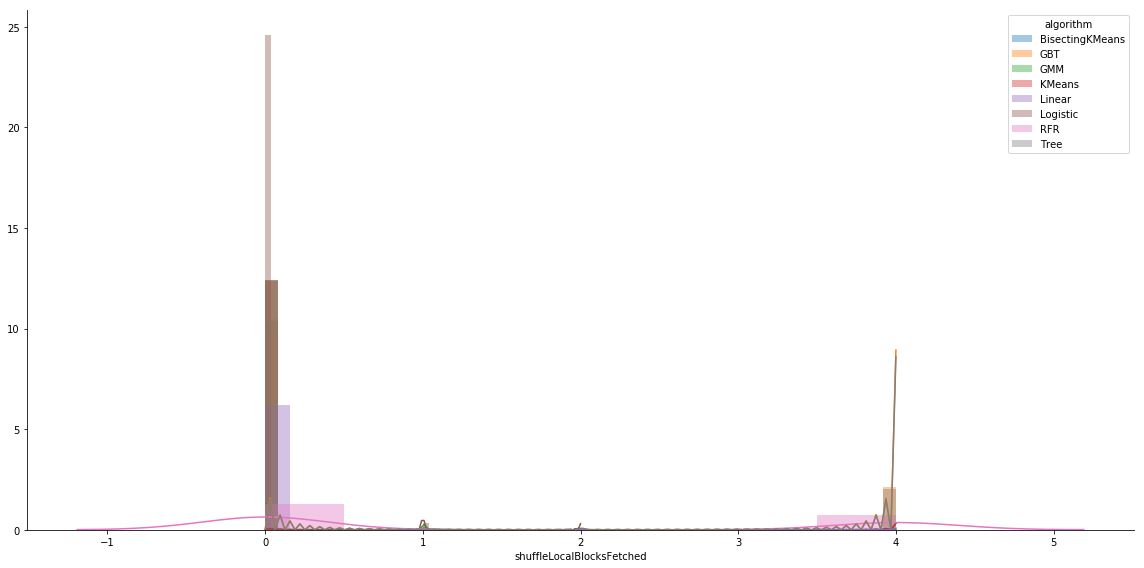

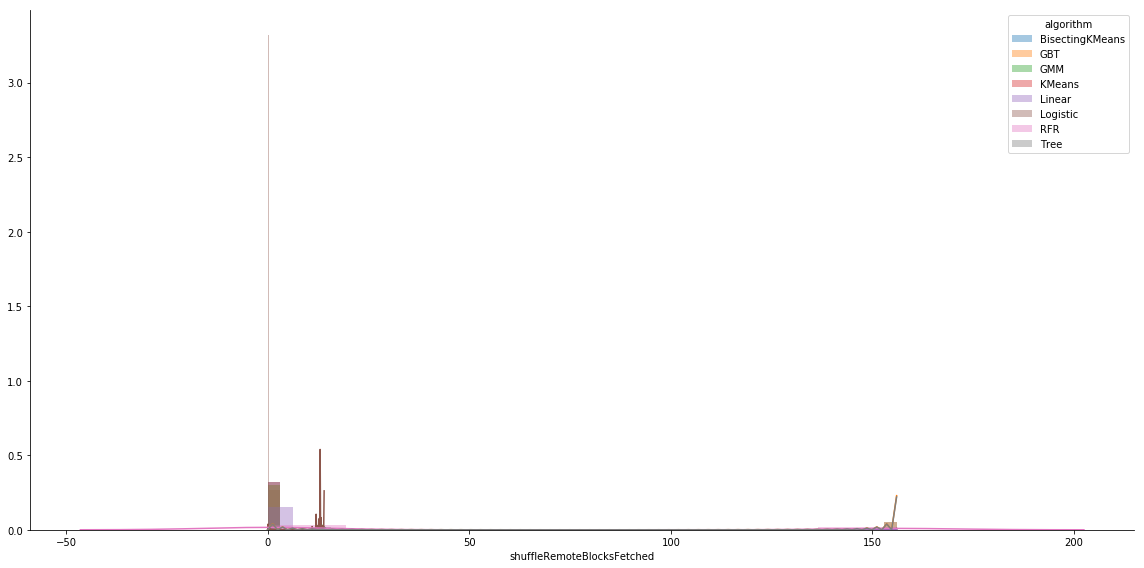

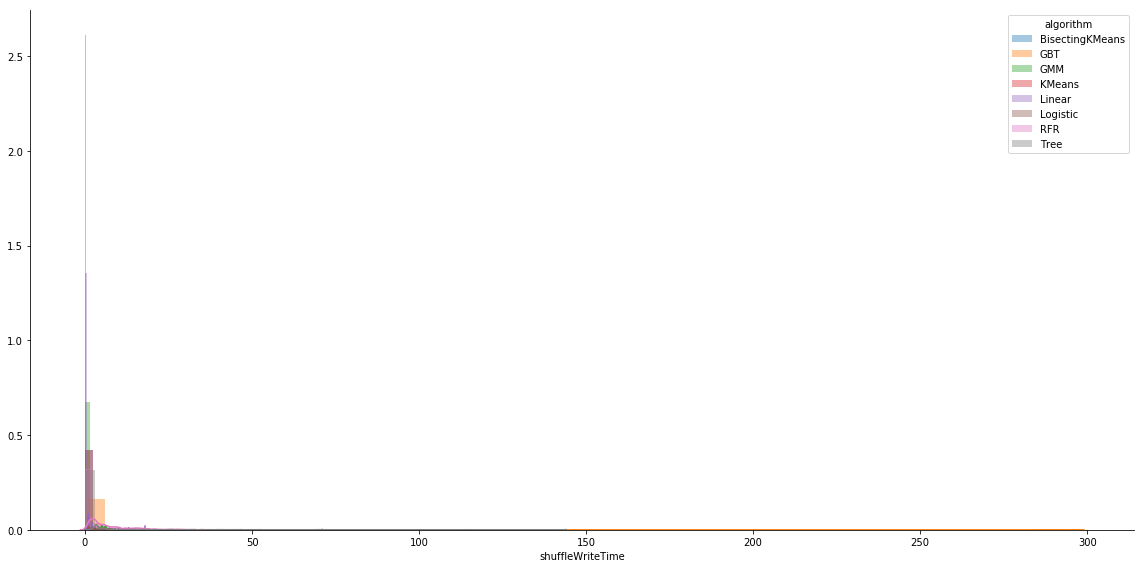

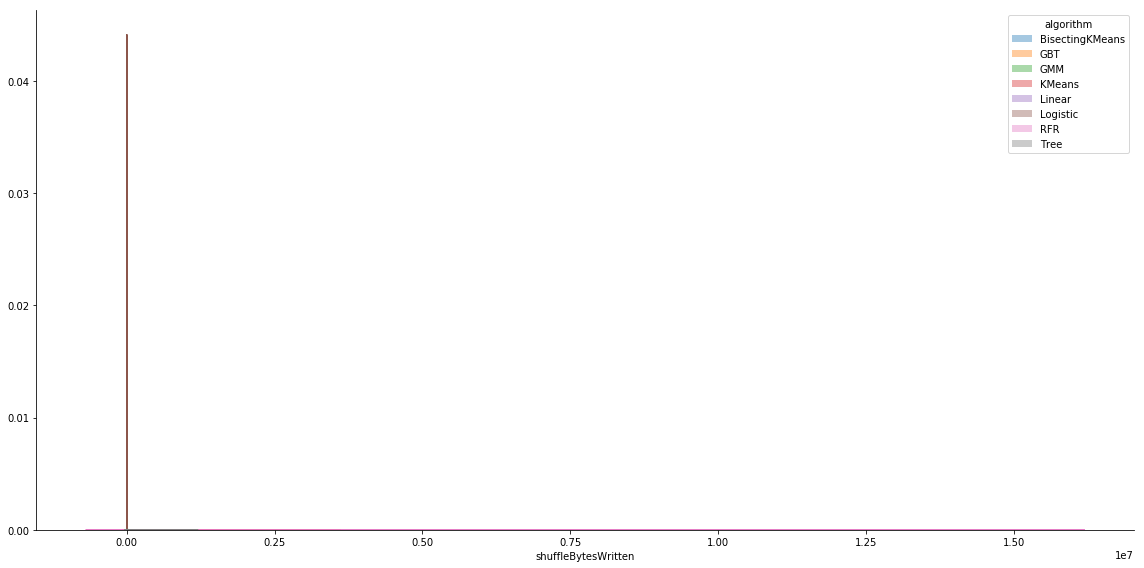

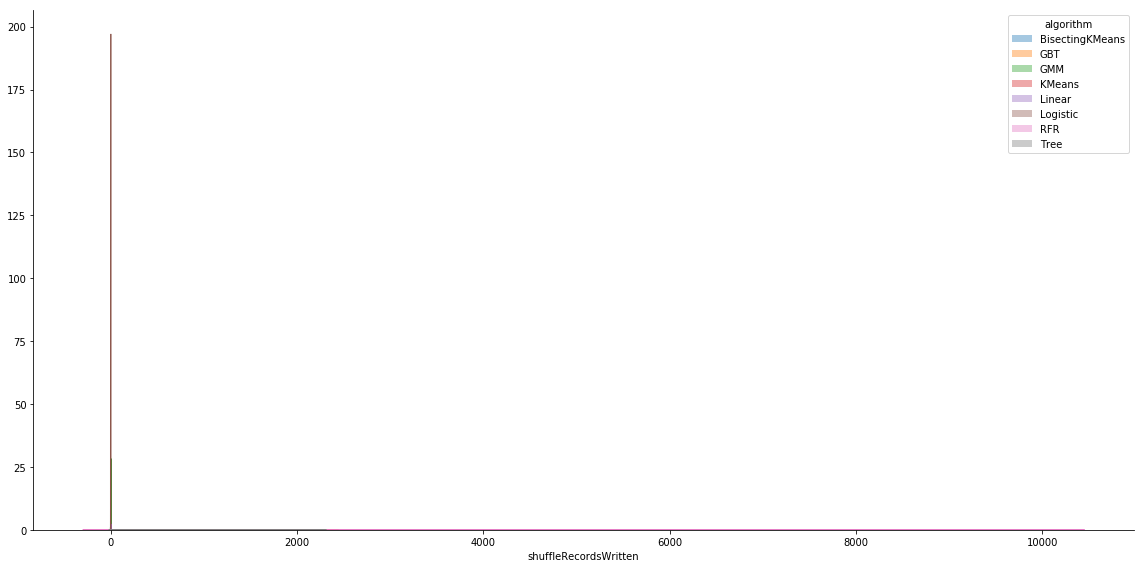

In [41]:
data = metrics
data = data[(data['phase'] == 'fit') & (data['runId'] == 1) & (data['platformId'] == 0)]

for y in spark:
    multidistplot(data, y, hue='algorithm', height=8, aspect=2)
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

data = metrics
data = data[(data['phase'] == 'fit') & (data['runId'] == 1) & (data['algorithm'] == 'RFR')]

X = pd.get_dummies(data[[*spark]]).astype(float)
y = data['platformId']

scaler = StandardScaler()

estimator = RandomForestClassifier(n_estimators=100, n_jobs=-1)

pipeline = make_pipeline(scaler, estimator)

cv = StratifiedKFold(5, shuffle=True)

scoring = 'f1_weighted'

cross_val_score(estimator=pipeline, X=X, y=y, cv=cv, scoring=scoring, n_jobs=-1)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
Exception in thread QueueManagerThread:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/opt/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py", line 708, in _queue_management_worker
    executor._adjust_process_count()
  File "/opt/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py", line 1007, in _adjust_process_count
    p.start()
  File "/opt/anaconda3/lib/python3.6/multiprocessing/process.py"